In [61]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

mpl.rc('figure', figsize=(8, 5))
mpl.rc('figure', dpi=300)

# Keras를 이용한 CNN 구현 - MNIST

In [62]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [63]:
X_train.shape

(60000, 28, 28, 1)

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [65]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [66]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 25s - loss: 0.8311 - acc: 0.7674 - val_loss: 0.3714 - val_acc: 0.8937
Epoch 2/10
 - 24s - loss: 0.3147 - acc: 0.9097 - val_loss: 0.2719 - val_acc: 0.9213
Epoch 3/10
 - 26s - loss: 0.2530 - acc: 0.9277 - val_loss: 0.2207 - val_acc: 0.9376
Epoch 4/10
 - 26s - loss: 0.2166 - acc: 0.9382 - val_loss: 0.1883 - val_acc: 0.9443
Epoch 5/10
 - 24s - loss: 0.1904 - acc: 0.9452 - val_loss: 0.1697 - val_acc: 0.9523
Epoch 6/10
 - 26s - loss: 0.1723 - acc: 0.9505 - val_loss: 0.1601 - val_acc: 0.9539
Epoch 7/10
 - 26s - loss: 0.1574 - acc: 0.9551 - val_loss: 0.1442 - val_acc: 0.9593
Epoch 8/10
 - 27s - loss: 0.1456 - acc: 0.9583 - val_loss: 0.1312 - val_acc: 0.9622
Epoch 9/10
 - 26s - loss: 0.1352 - acc: 0.9619 - val_loss: 0.1318 - val_acc: 0.9610
Epoch 10/10
 - 25s - loss: 0.1271 - acc: 0.9641 - val_loss: 0.1147 - val_acc: 0.9668
CPU times: user 7min 39s, sys: 4min 53s, total: 12min 33s
Wall time: 4min 15s


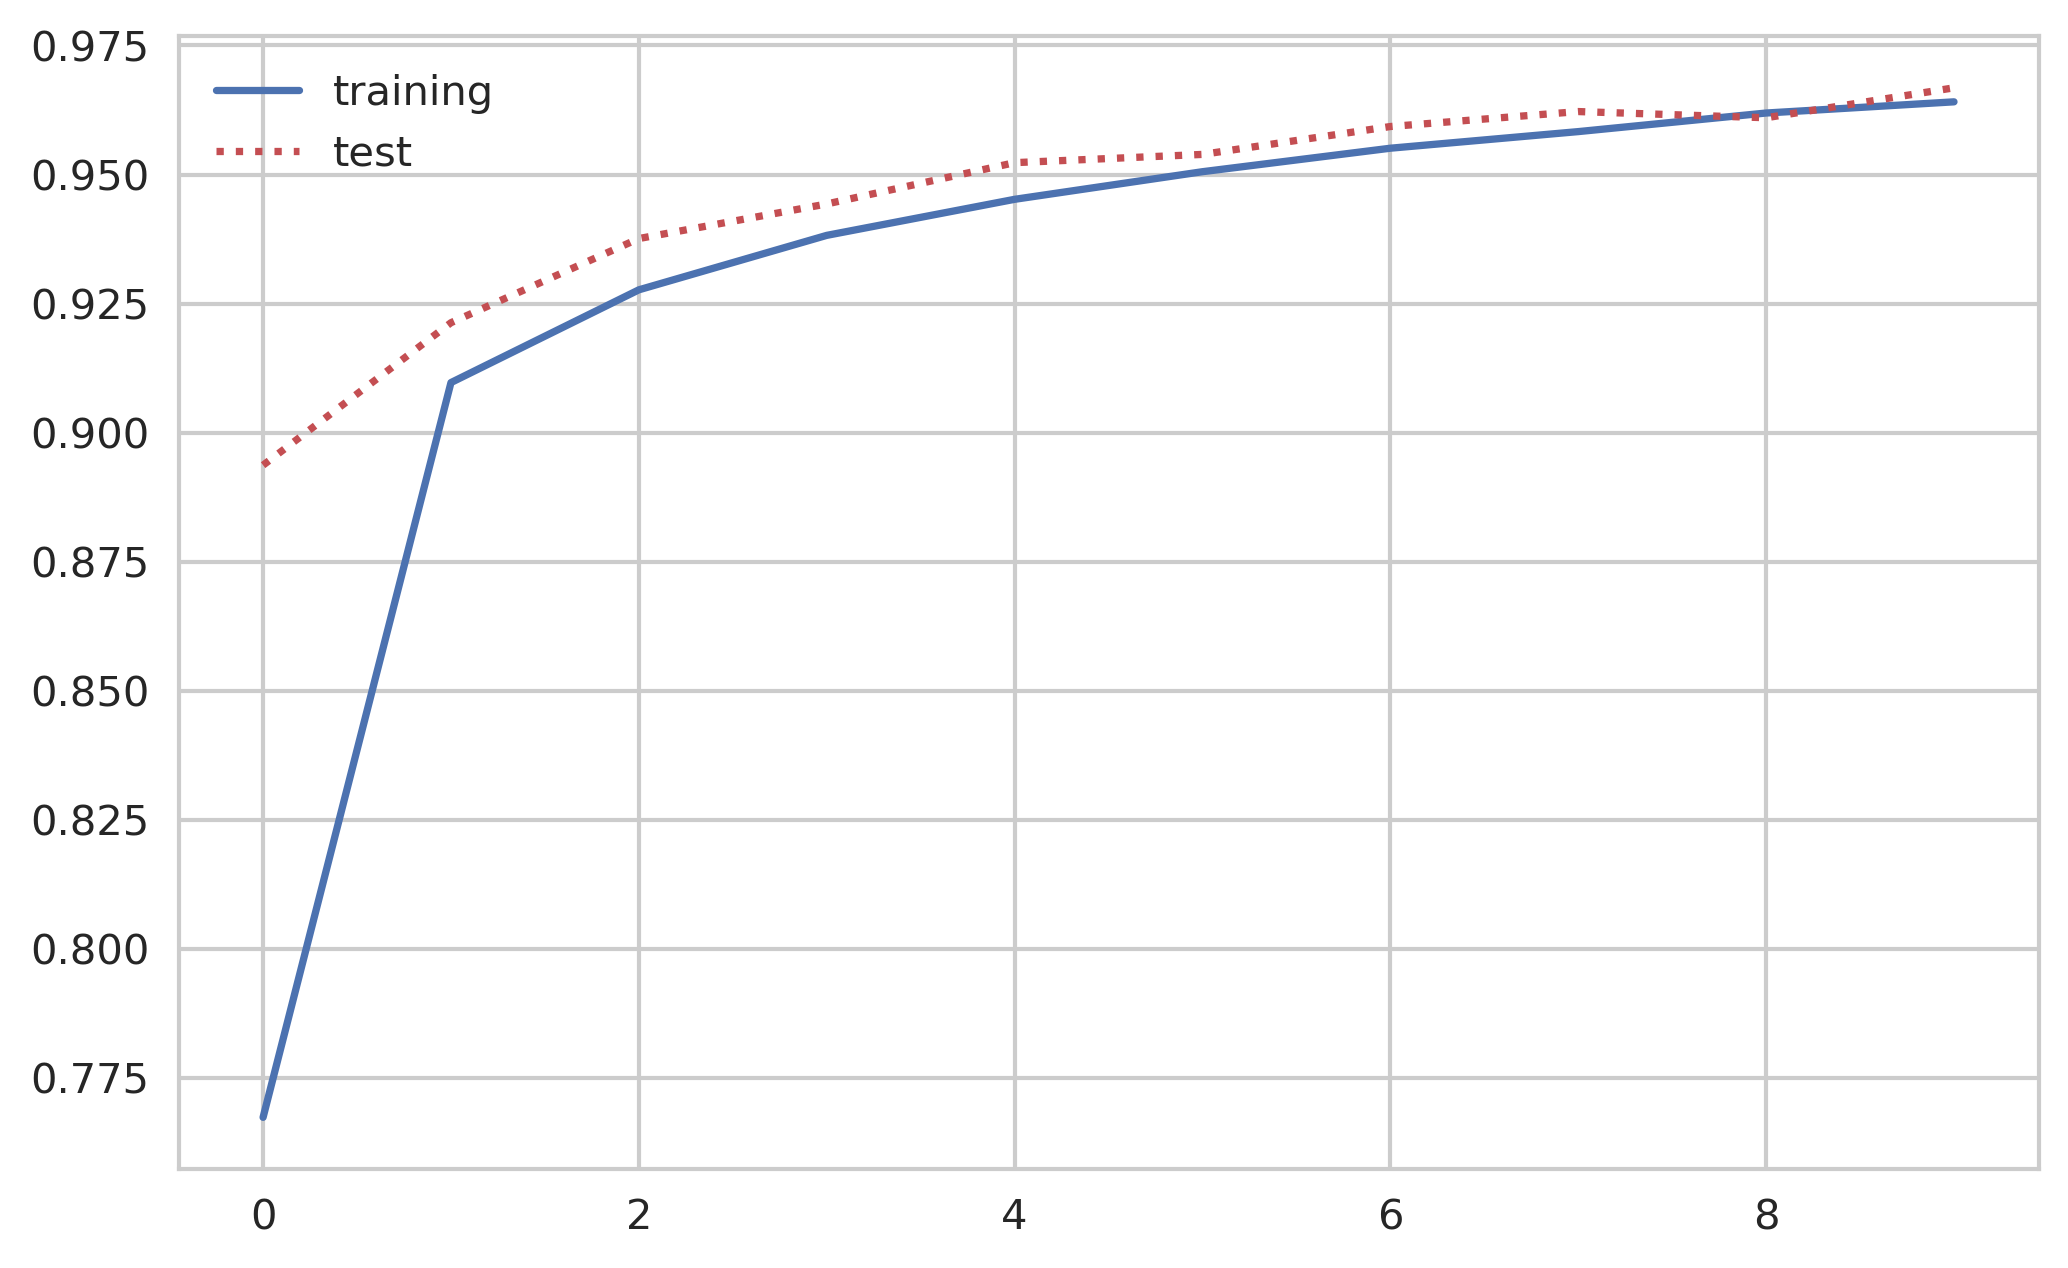

In [67]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [27]:
model1.save("mnist_cnn11.hdf5")

In [28]:
l1 = model1.layers[0]
w1, b1 = l1.get_weights()

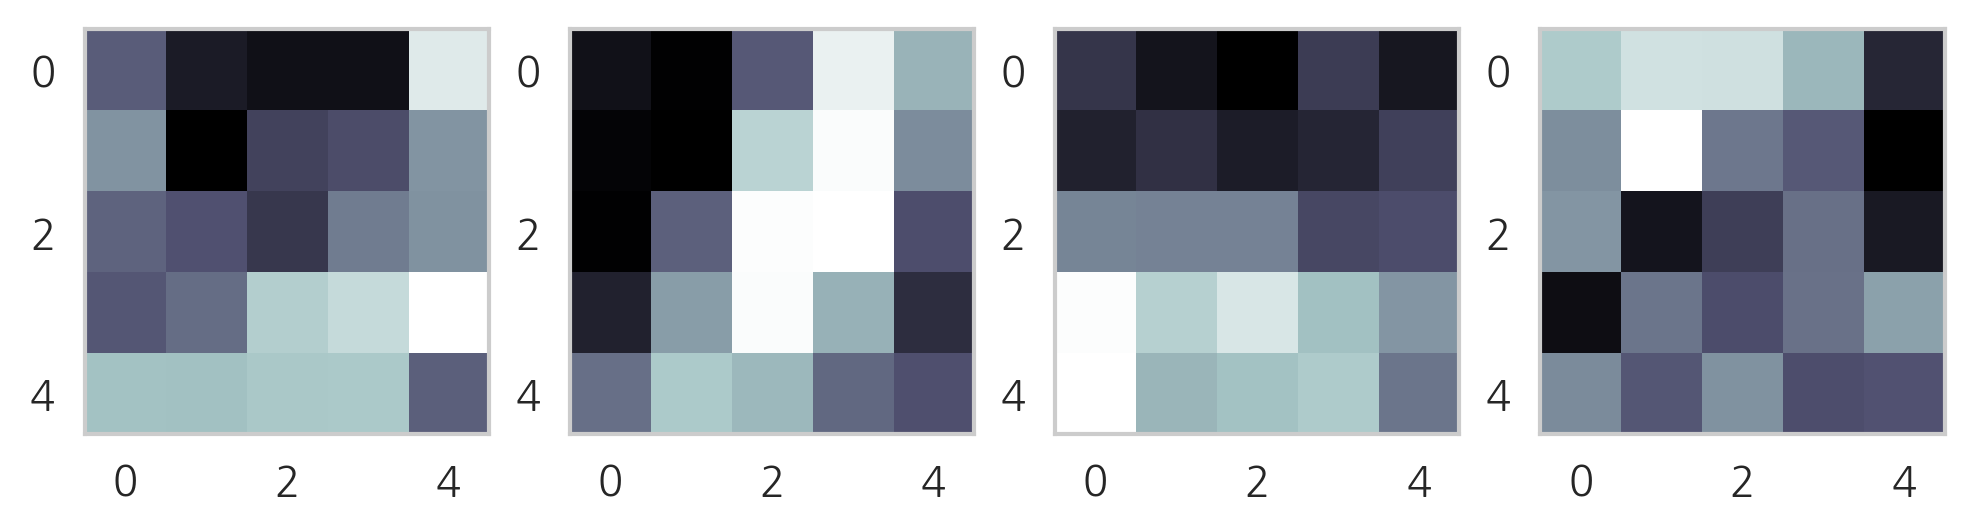

In [29]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w1[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [32]:
def visualize1(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(4, (5, 5), activation='linear', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w1, b1)))
    model1_test2.add(MaxPooling2D())
    a_test = model1_test1.predict(x_test)
    z_test = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 6))
    M = 4
    for i in range(M + 1):
        if i == 0:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(3, M + 1, i + 1)
            plt.imshow(w1[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + M + 1)
            plt.imshow(a_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(3, M + 1, i + 1 + 2 * M + 2)
            plt.imshow(z_test[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

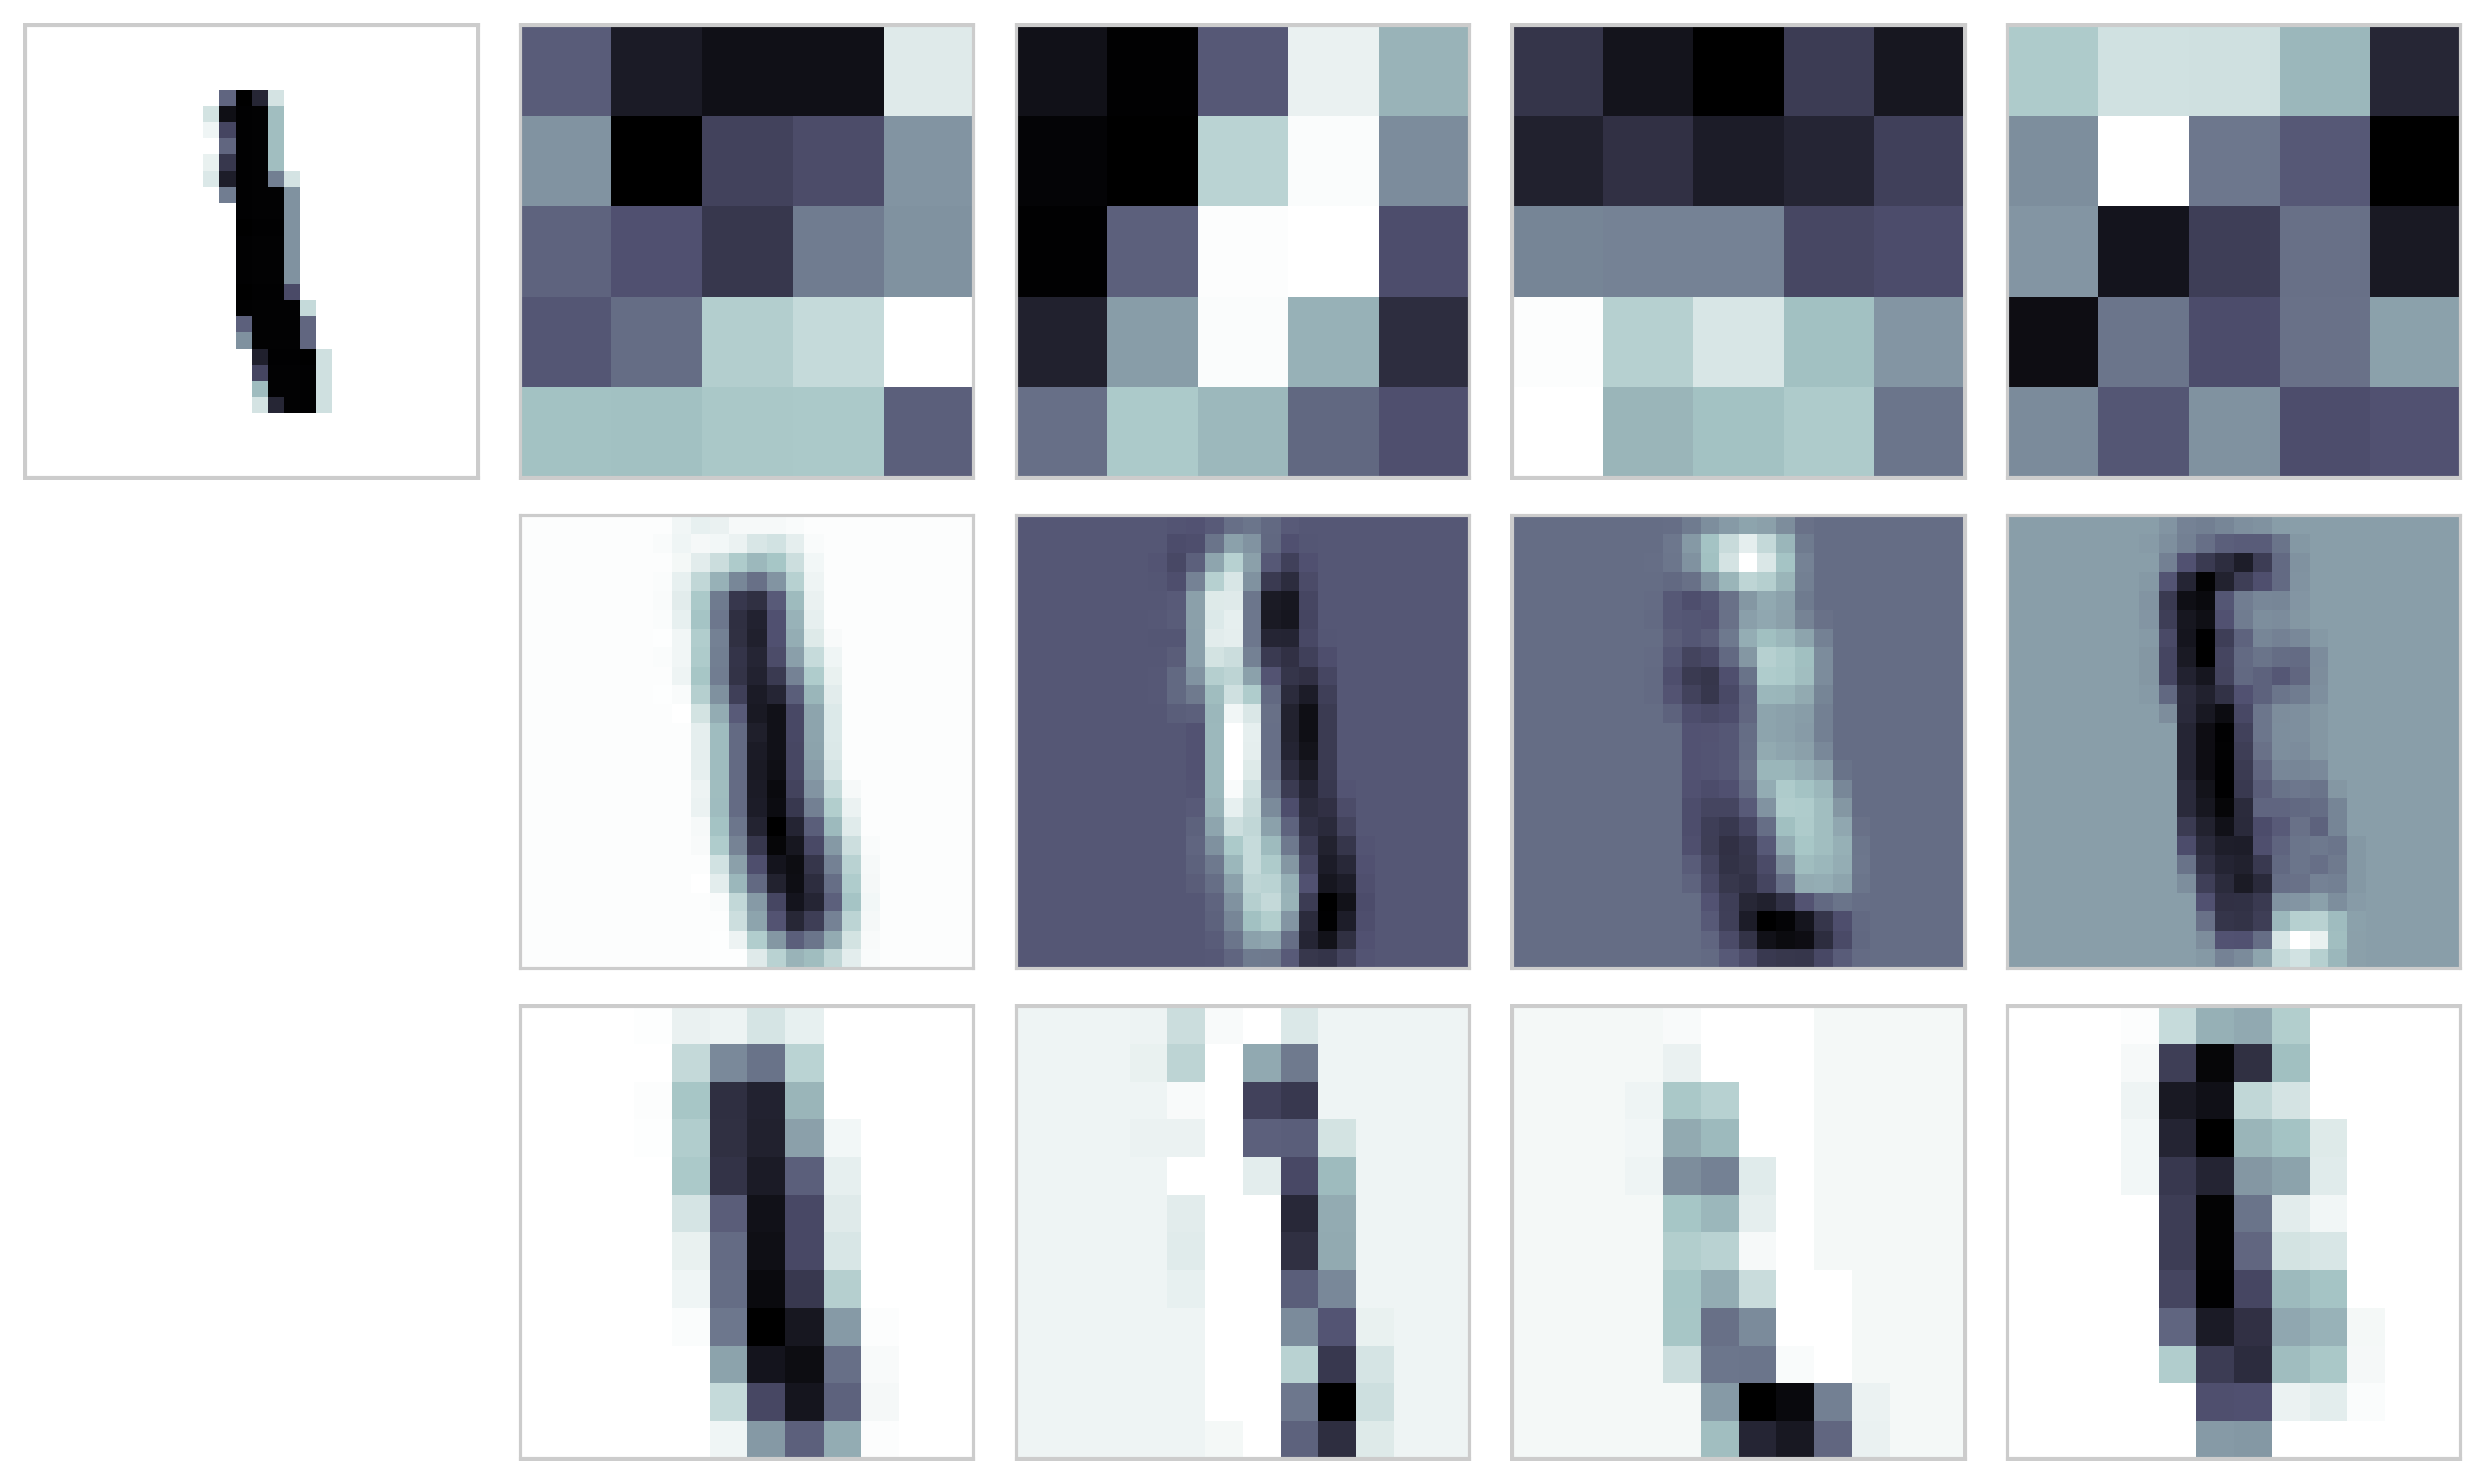

In [33]:
i = 6
visualize1(X_train[i:i + 1])

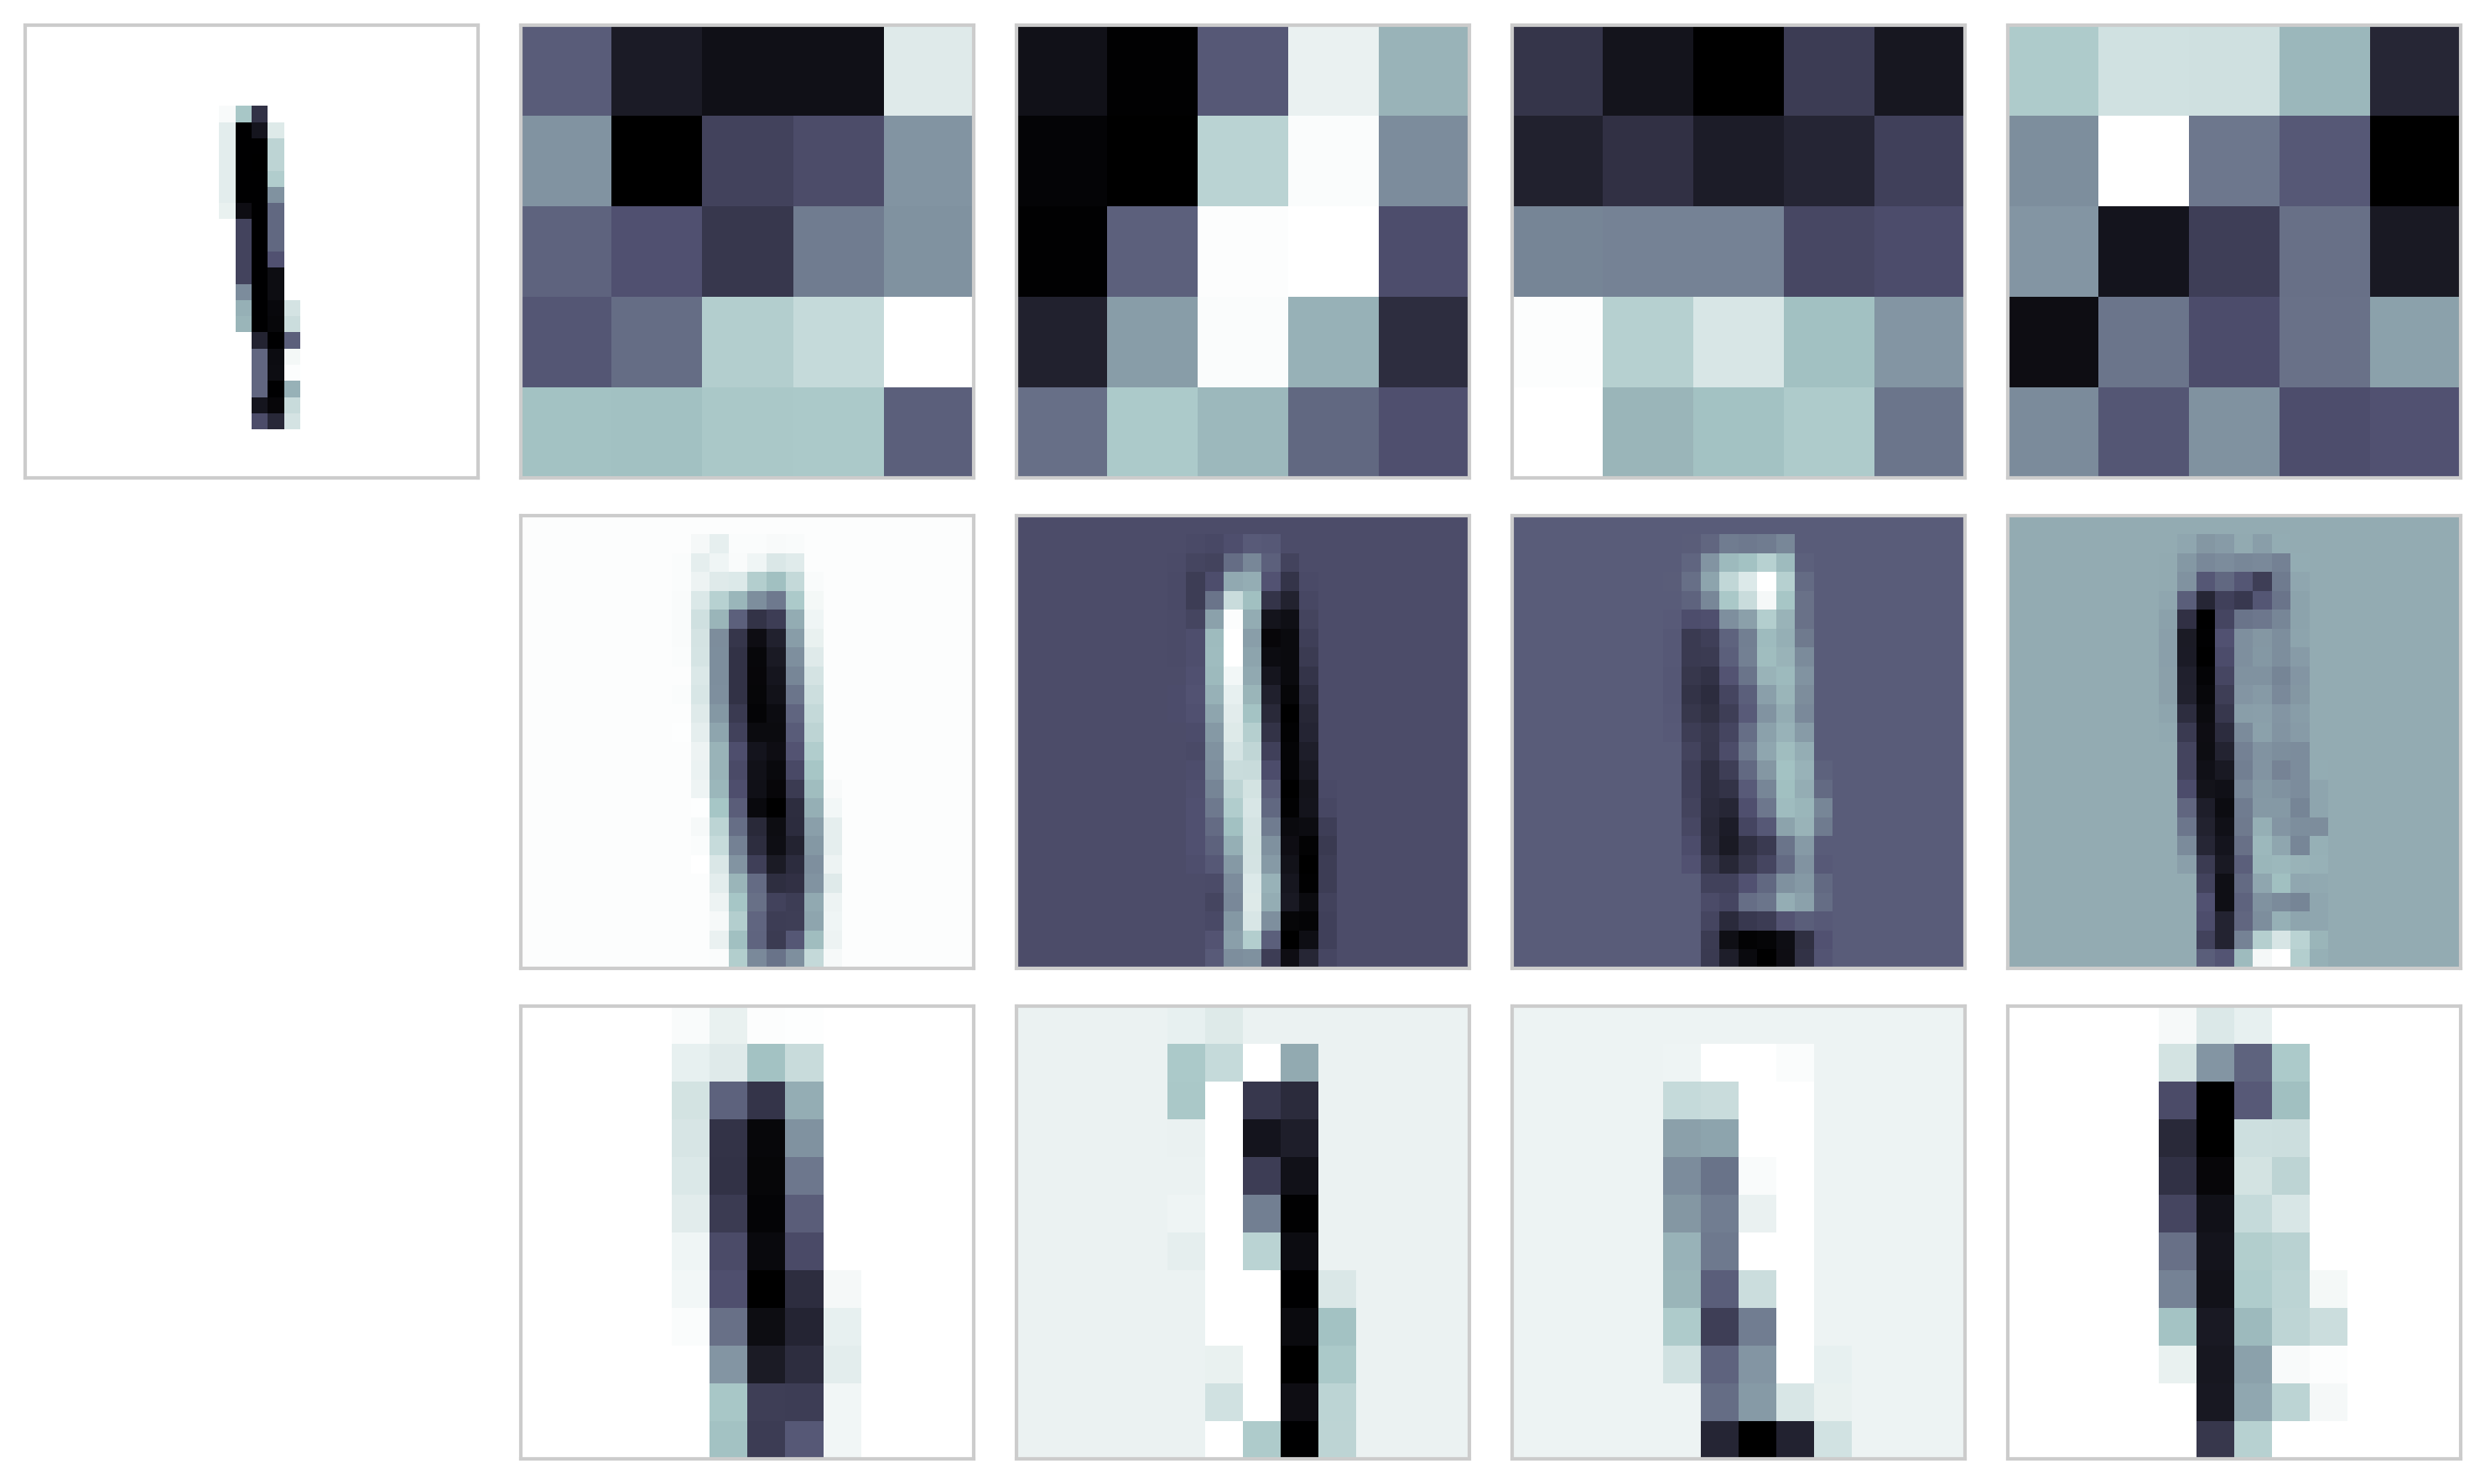

In [34]:
i = 8
visualize1(X_train[i:i + 1])

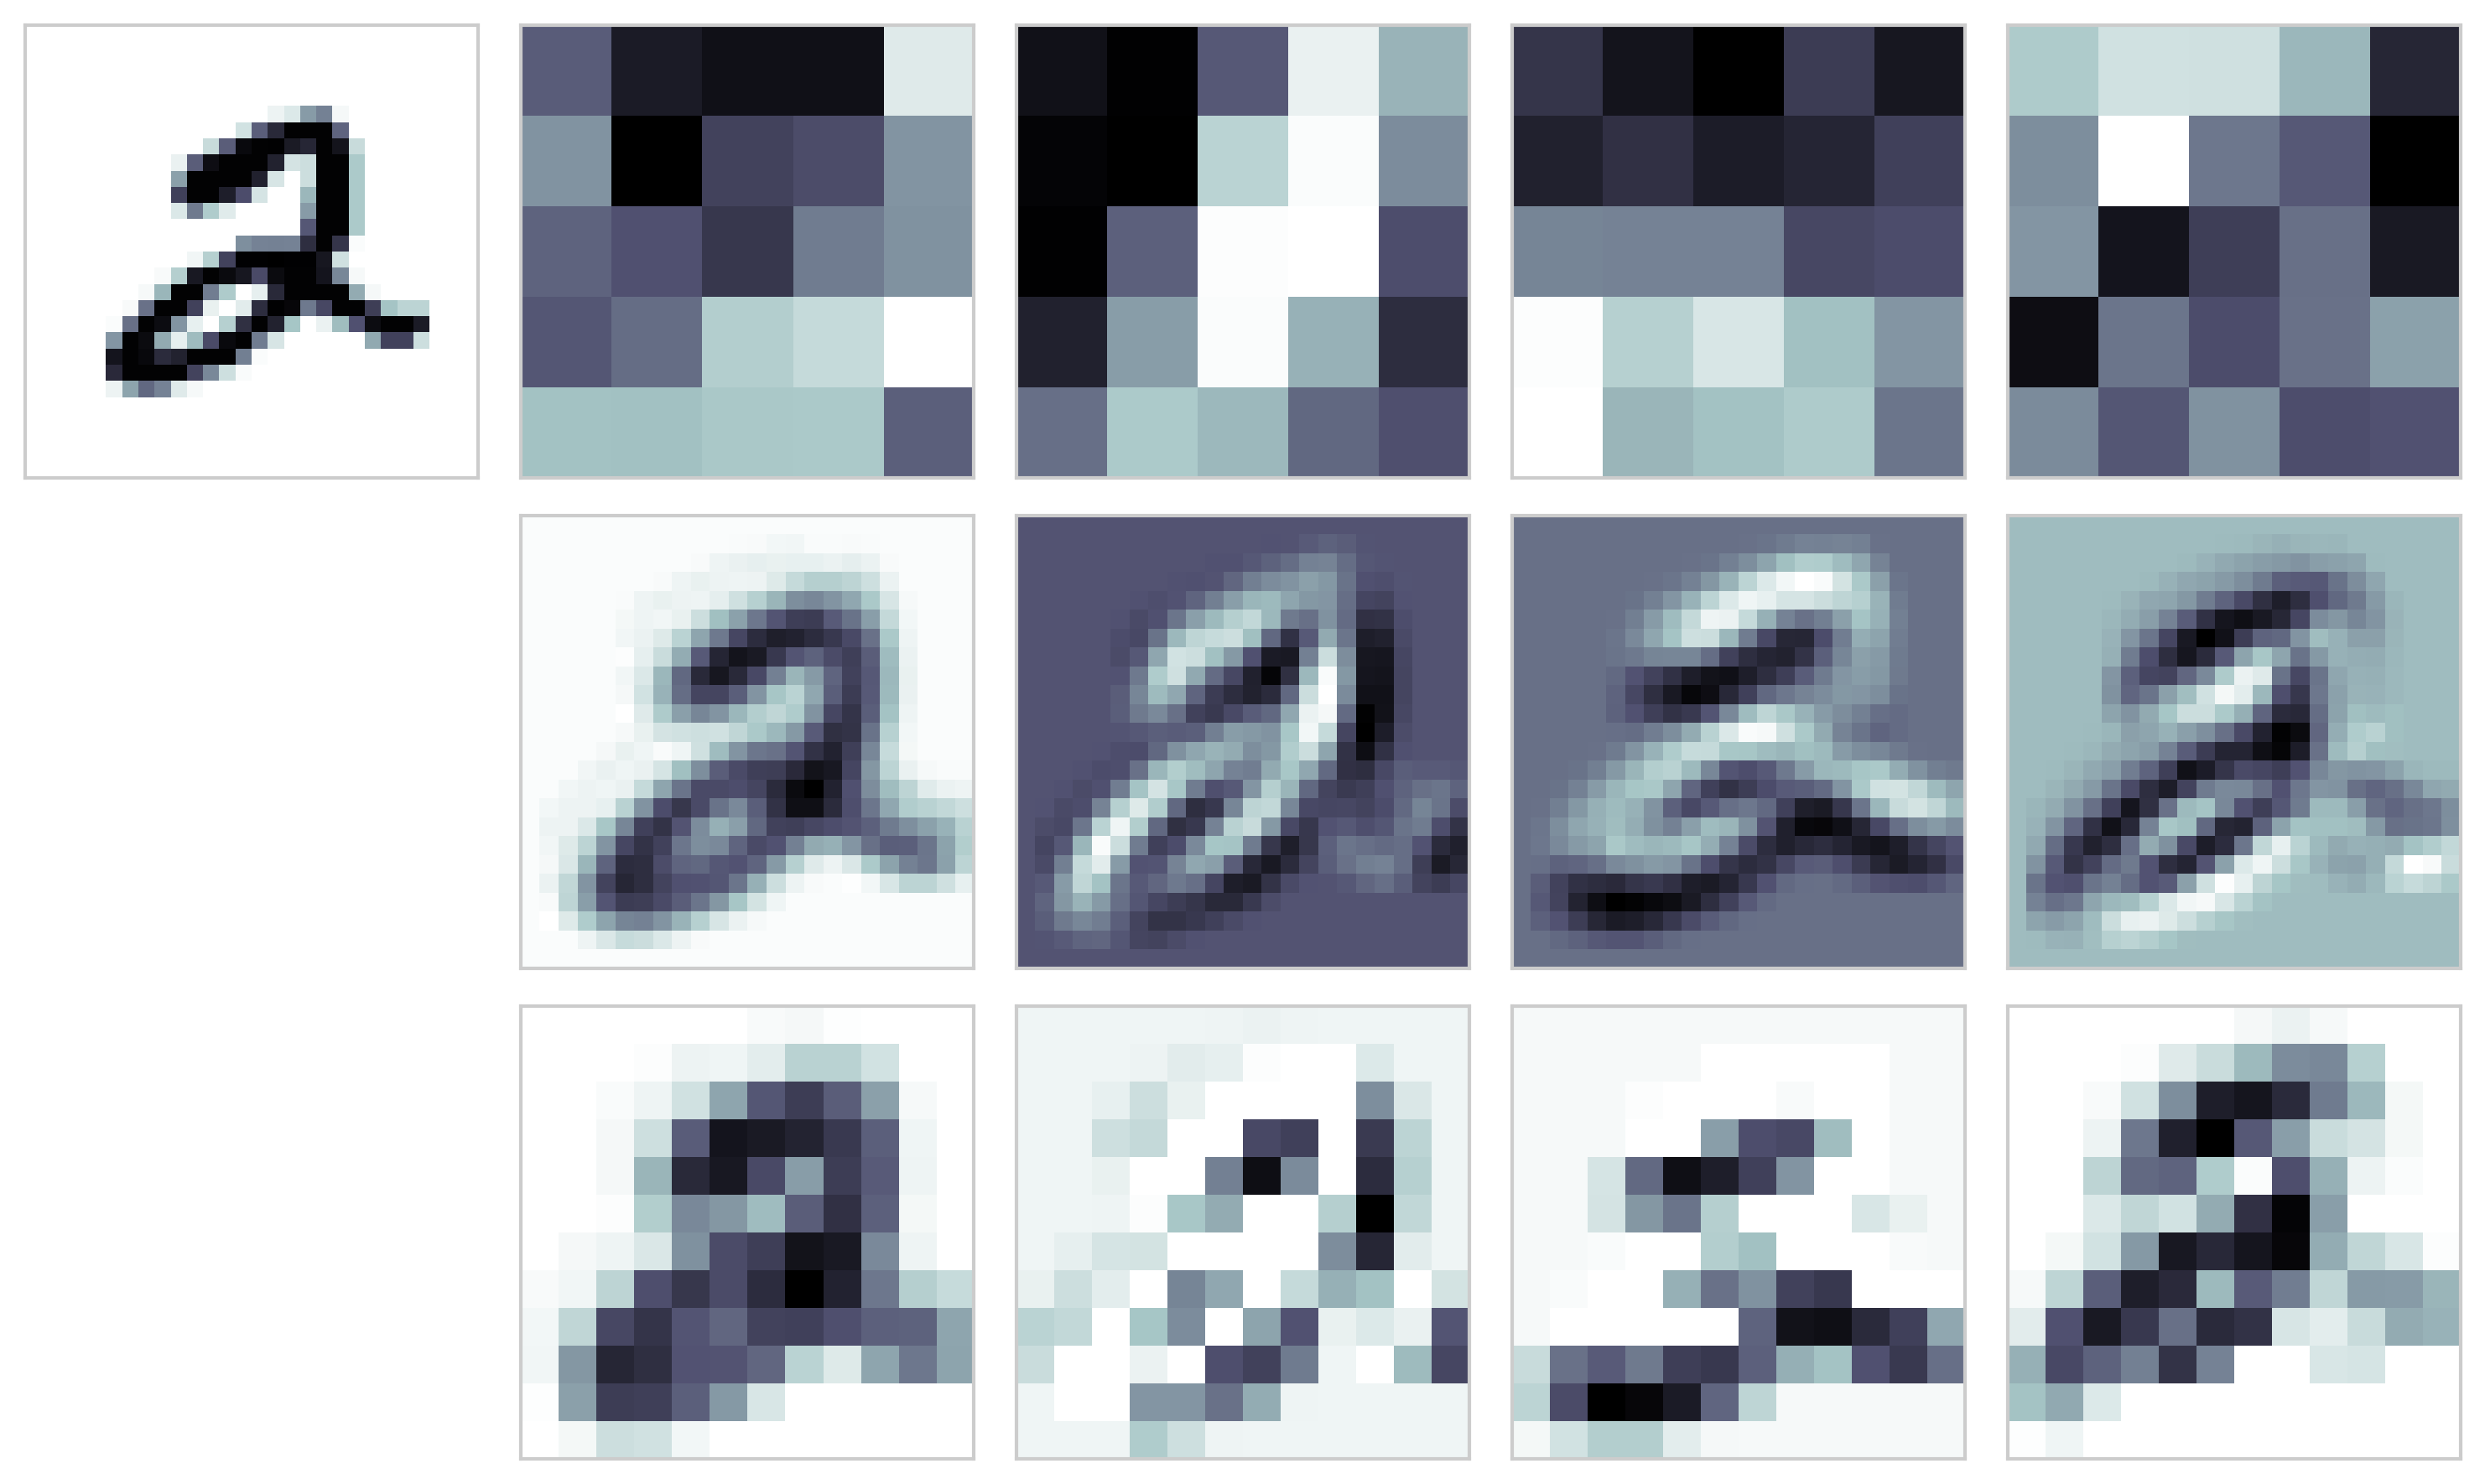

In [35]:
i = 5
visualize1(X_train[i:i + 1])

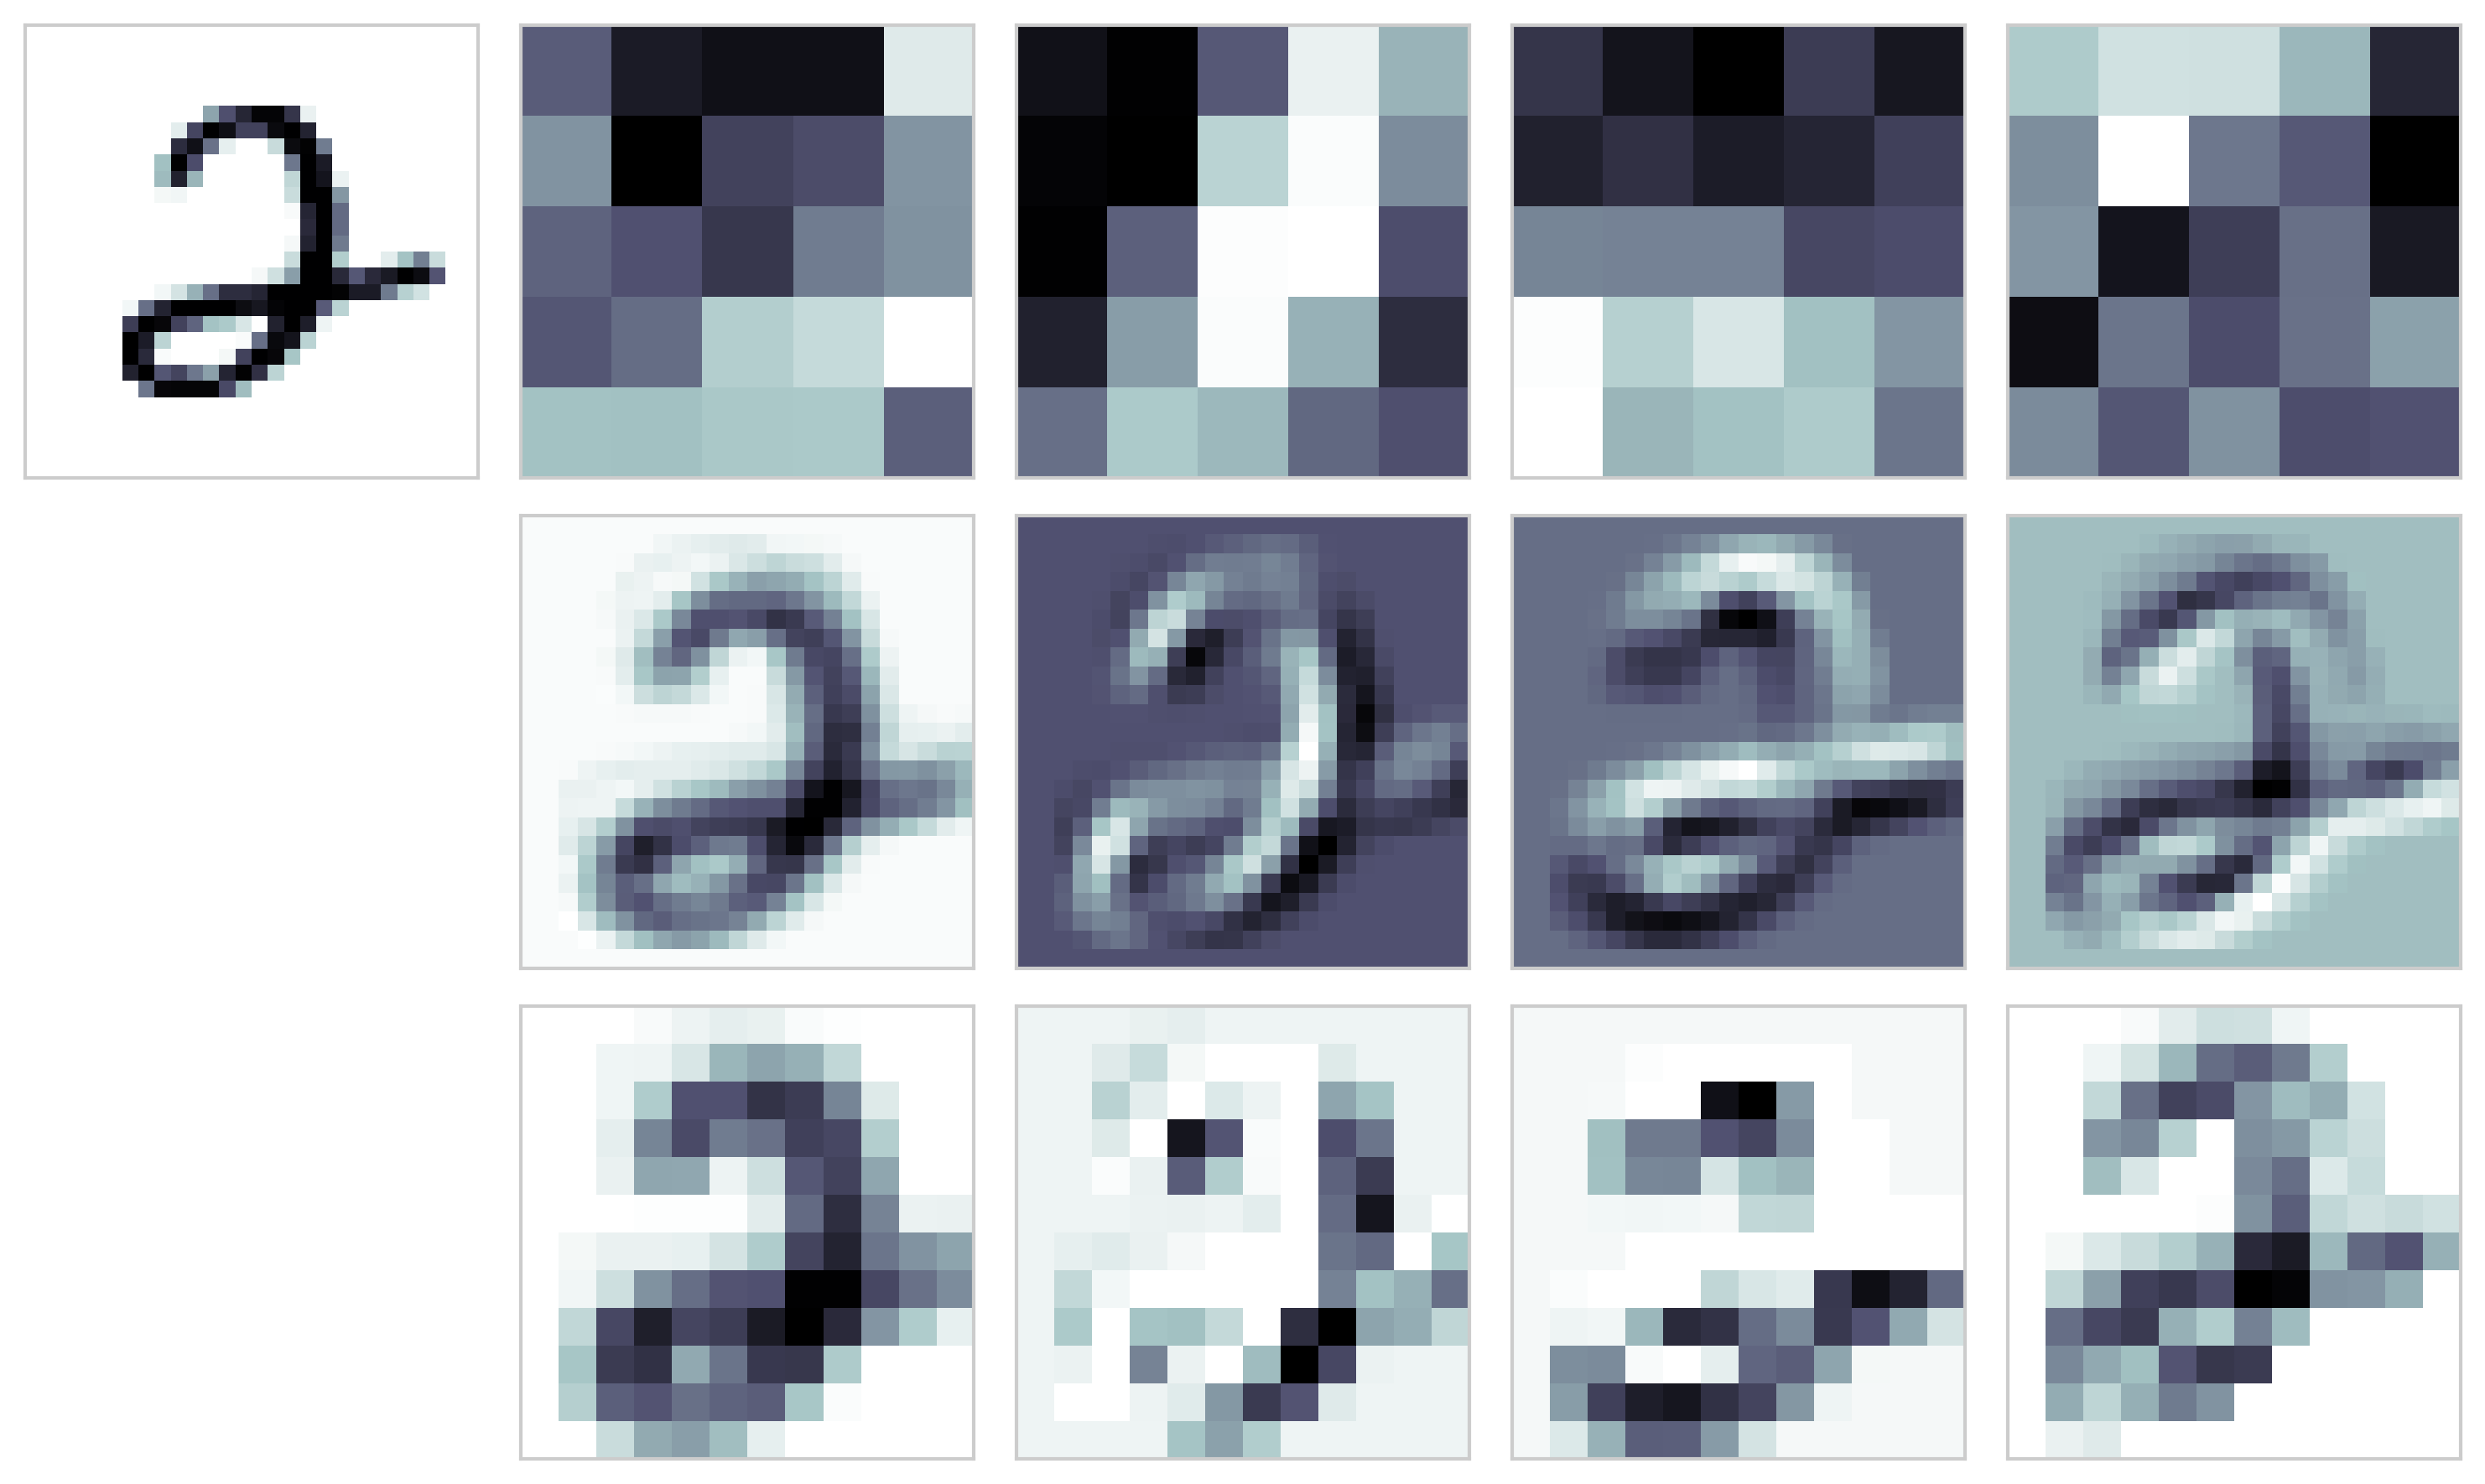

In [36]:
i = 16
visualize1(X_train[i:i + 1])

### 2 Convolution Layers

In [46]:
np.random.seed(0)

model2 = Sequential()

model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

In [47]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 4)           404       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 4)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [48]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [49]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 44s - loss: 1.0380 - acc: 0.6536 - val_loss: 0.4438 - val_acc: 0.8580
Epoch 2/20
 - 47s - loss: 0.3550 - acc: 0.8907 - val_loss: 0.2767 - val_acc: 0.9173
Epoch 3/20
 - 54s - loss: 0.2726 - acc: 0.9174 - val_loss: 0.2283 - val_acc: 0.9311
Epoch 4/20
 - 38s - loss: 0.2339 - acc: 0.9295 - val_loss: 0.2026 - val_acc: 0.9380
Epoch 5/20
 - 34s - loss: 0.2070 - acc: 0.9376 - val_loss: 0.1835 - val_acc: 0.9455
Epoch 6/20
 - 36s - loss: 0.1895 - acc: 0.9431 - val_loss: 0.1631 - val_acc: 0.9519
Epoch 7/20
 - 35s - loss: 0.1745 - acc: 0.9474 - val_loss: 0.1532 - val_acc: 0.9550
Epoch 8/20
 - 35s - loss: 0.1632 - acc: 0.9512 - val_loss: 0.1434 - val_acc: 0.9577
Epoch 9/20
 - 39s - loss: 0.1524 - acc: 0.9543 - val_loss: 0.1329 - val_acc: 0.9609
Epoch 10/20
 - 41s - loss: 0.1443 - acc: 0.9568 - val_loss: 0.1295 - val_acc: 0.9624
Epoch 11/20
 - 41s - loss: 0.1379 - acc: 0.9590 - val_loss: 0.1198 - val_acc: 0.9648
Epoch 12/20
 - 46s - los

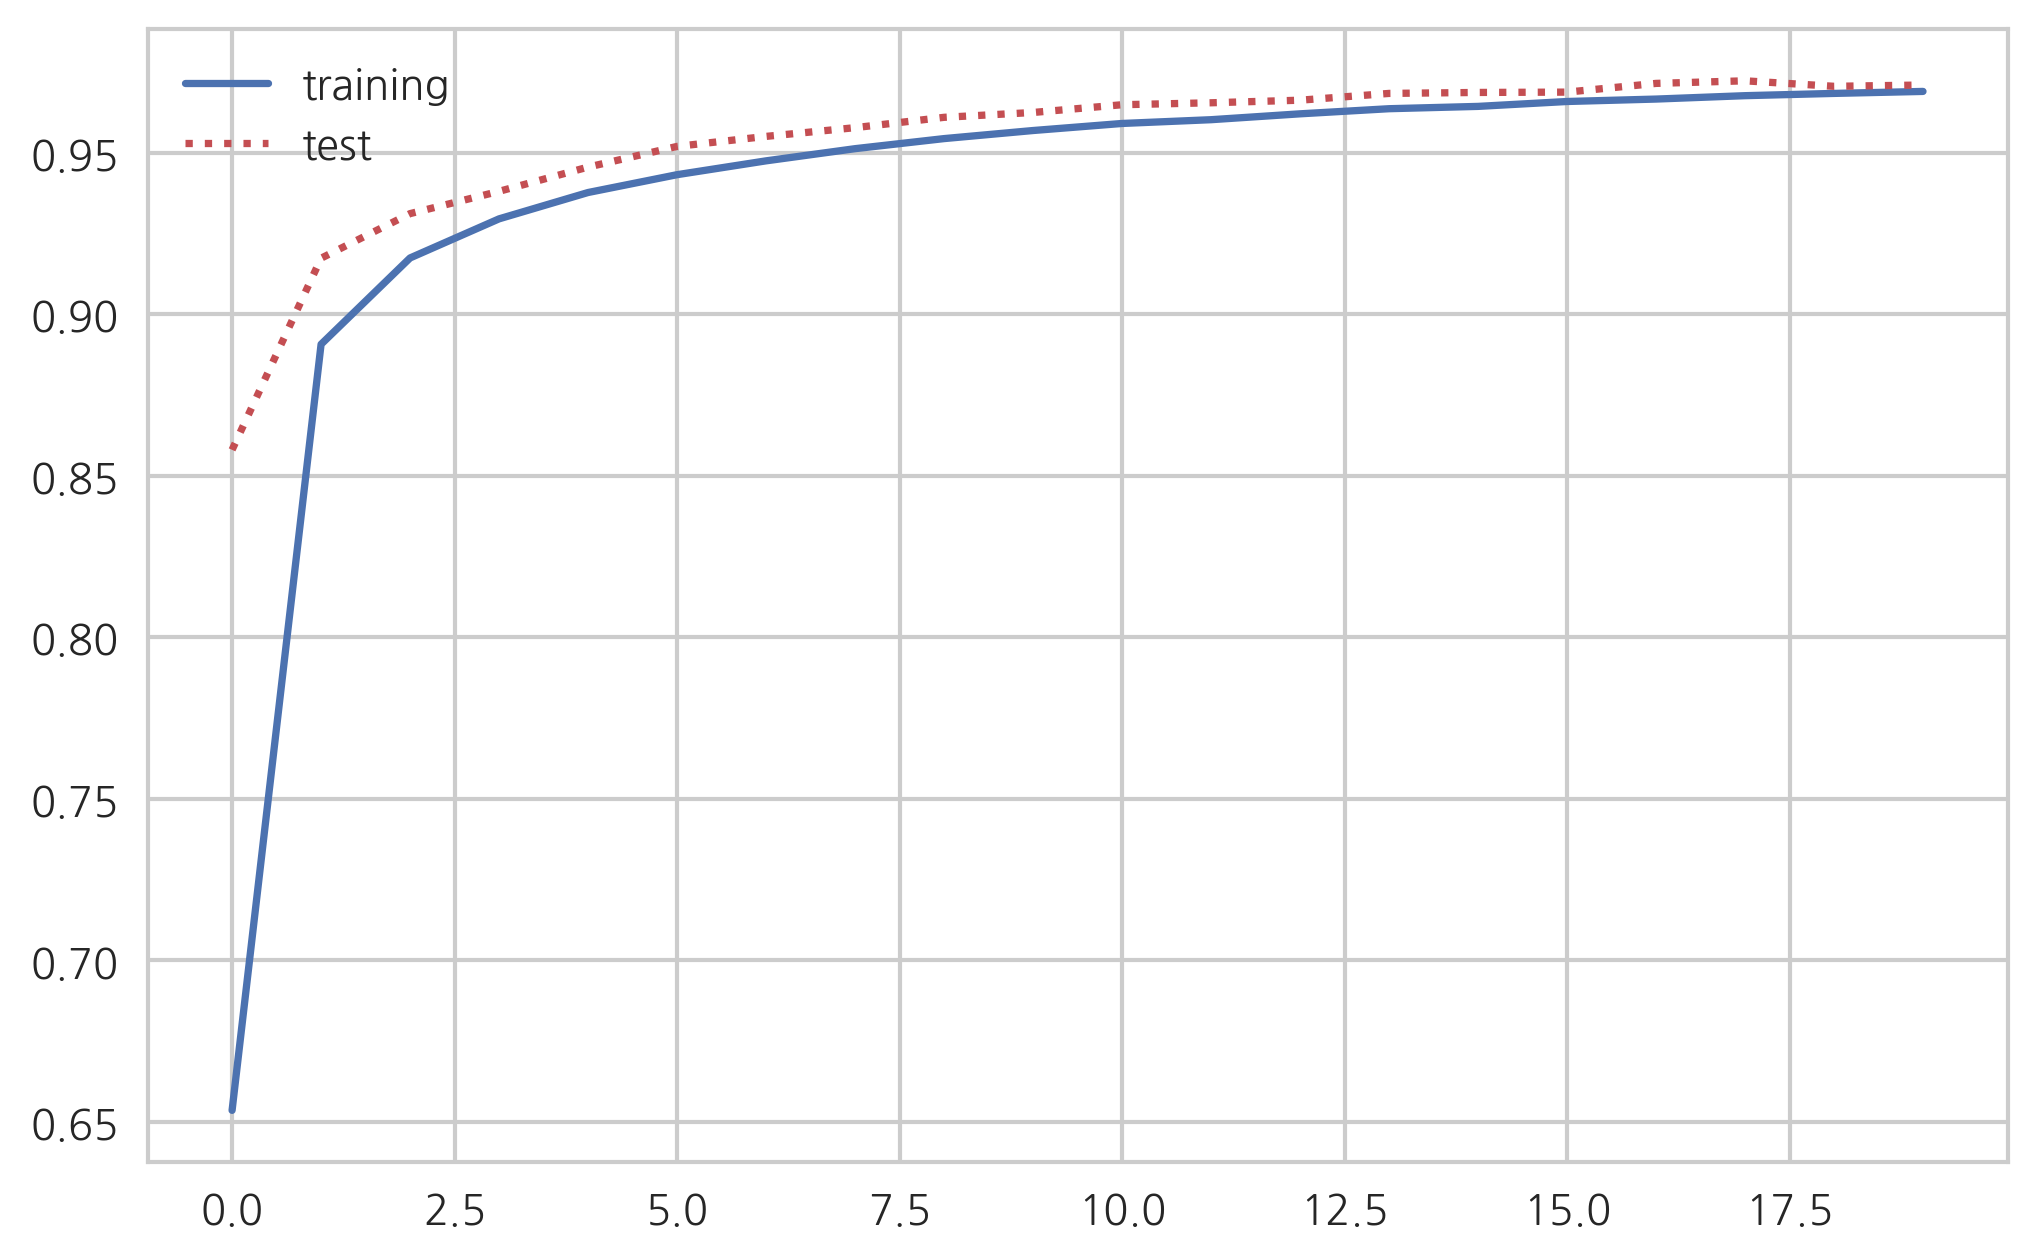

In [50]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [51]:
model2.save("mnist_cnn21.hdf5")

In [52]:
l21 = model2.layers[0]
w21, b21 = l21.get_weights()

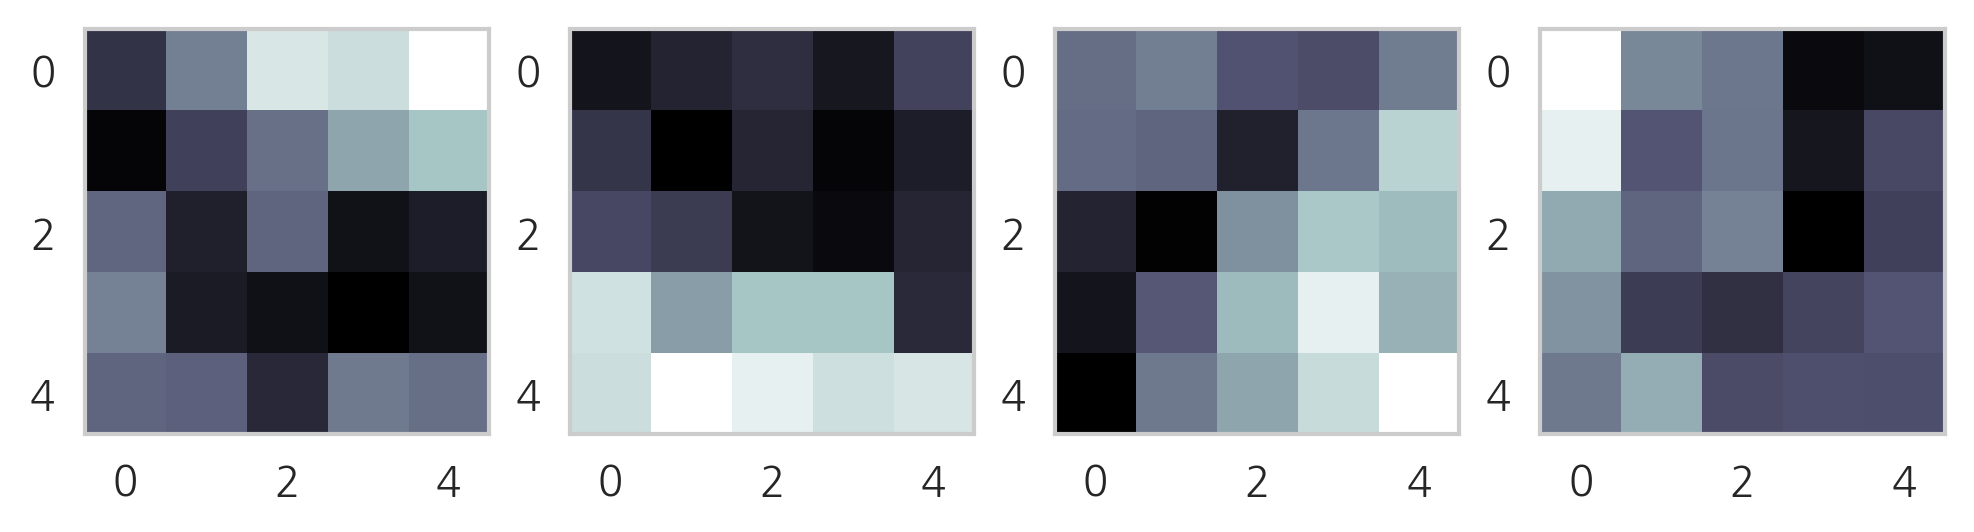

In [53]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w21[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [54]:
l22 = model2.layers[2]
w22, b22 = l22.get_weights()

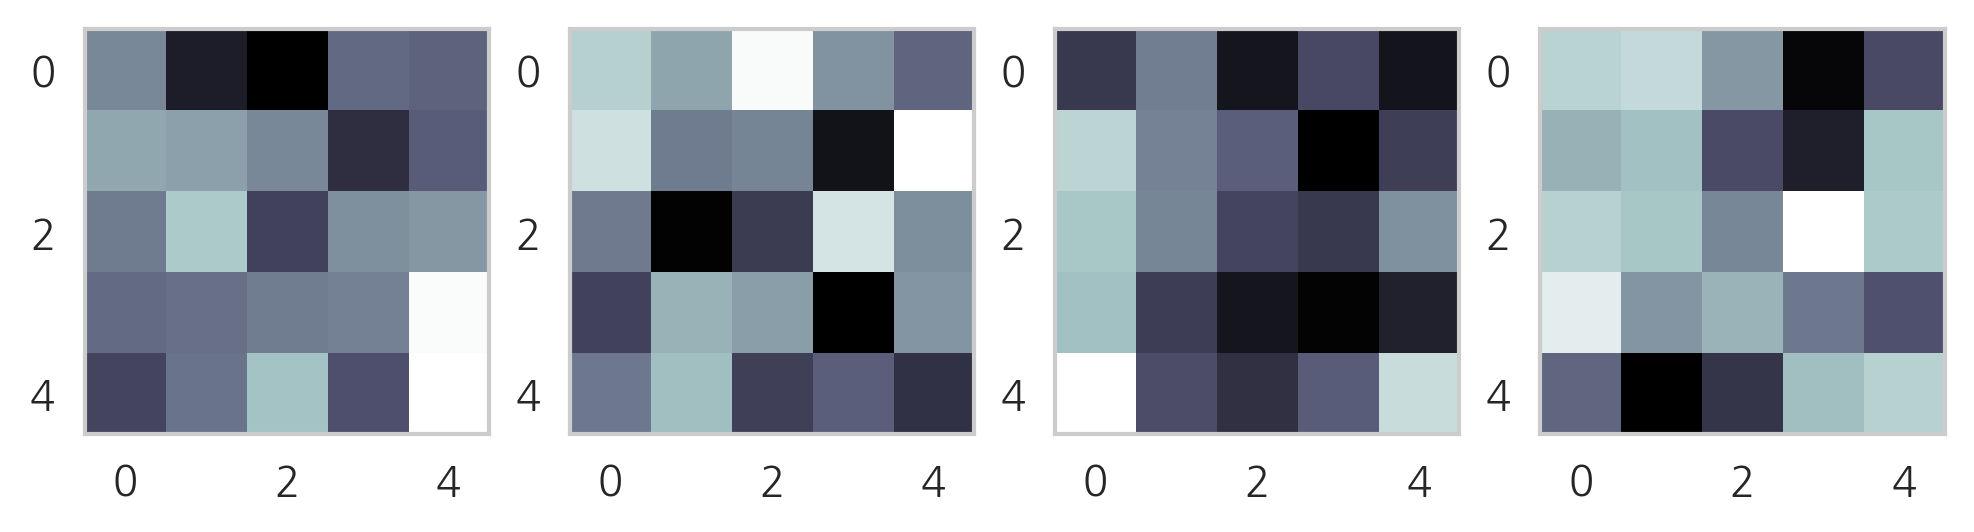

In [55]:
M = 4
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(w22[:, :, 0, i], cmap=mpl.cm.bone_r)
    plt.grid(False)

In [56]:
def visualize2(x_test):
    model1_test1 = Sequential()
    model1_test1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w21, b21)))
    model1_test1.add(MaxPooling2D())
    a_test1 = model1_test1.predict(x_test)
    model1_test2 = Sequential()
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), weights=(w21, b21)))
    model1_test2.add(MaxPooling2D())
    model1_test2.add(Conv2D(4, (5, 5), activation='relu', weights=(w22, b22)))
    model1_test2.add(MaxPooling2D())
    a_test2 = model1_test2.predict(x_test)
    
    plt.figure(figsize=(10, 7))
    M = 4
    for i in range(M + 1):
        if i == 0:
            plt.subplot(4, M + 1, i + 1)
            plt.imshow(x_test[0, :, :, i], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
        else:
            plt.subplot(4, M + 1, i + 1)
            plt.imshow(w21[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + M + 1)
            plt.imshow(a_test1[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + 2 * M + 2)
            plt.imshow(w22[:, :, 0, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
            plt.subplot(4, M + 1, i + 1 + 3 * M + 3)
            plt.imshow(a_test2[0, :, :, i - 1], cmap=mpl.cm.bone_r)
            plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.tight_layout()
    plt.show()

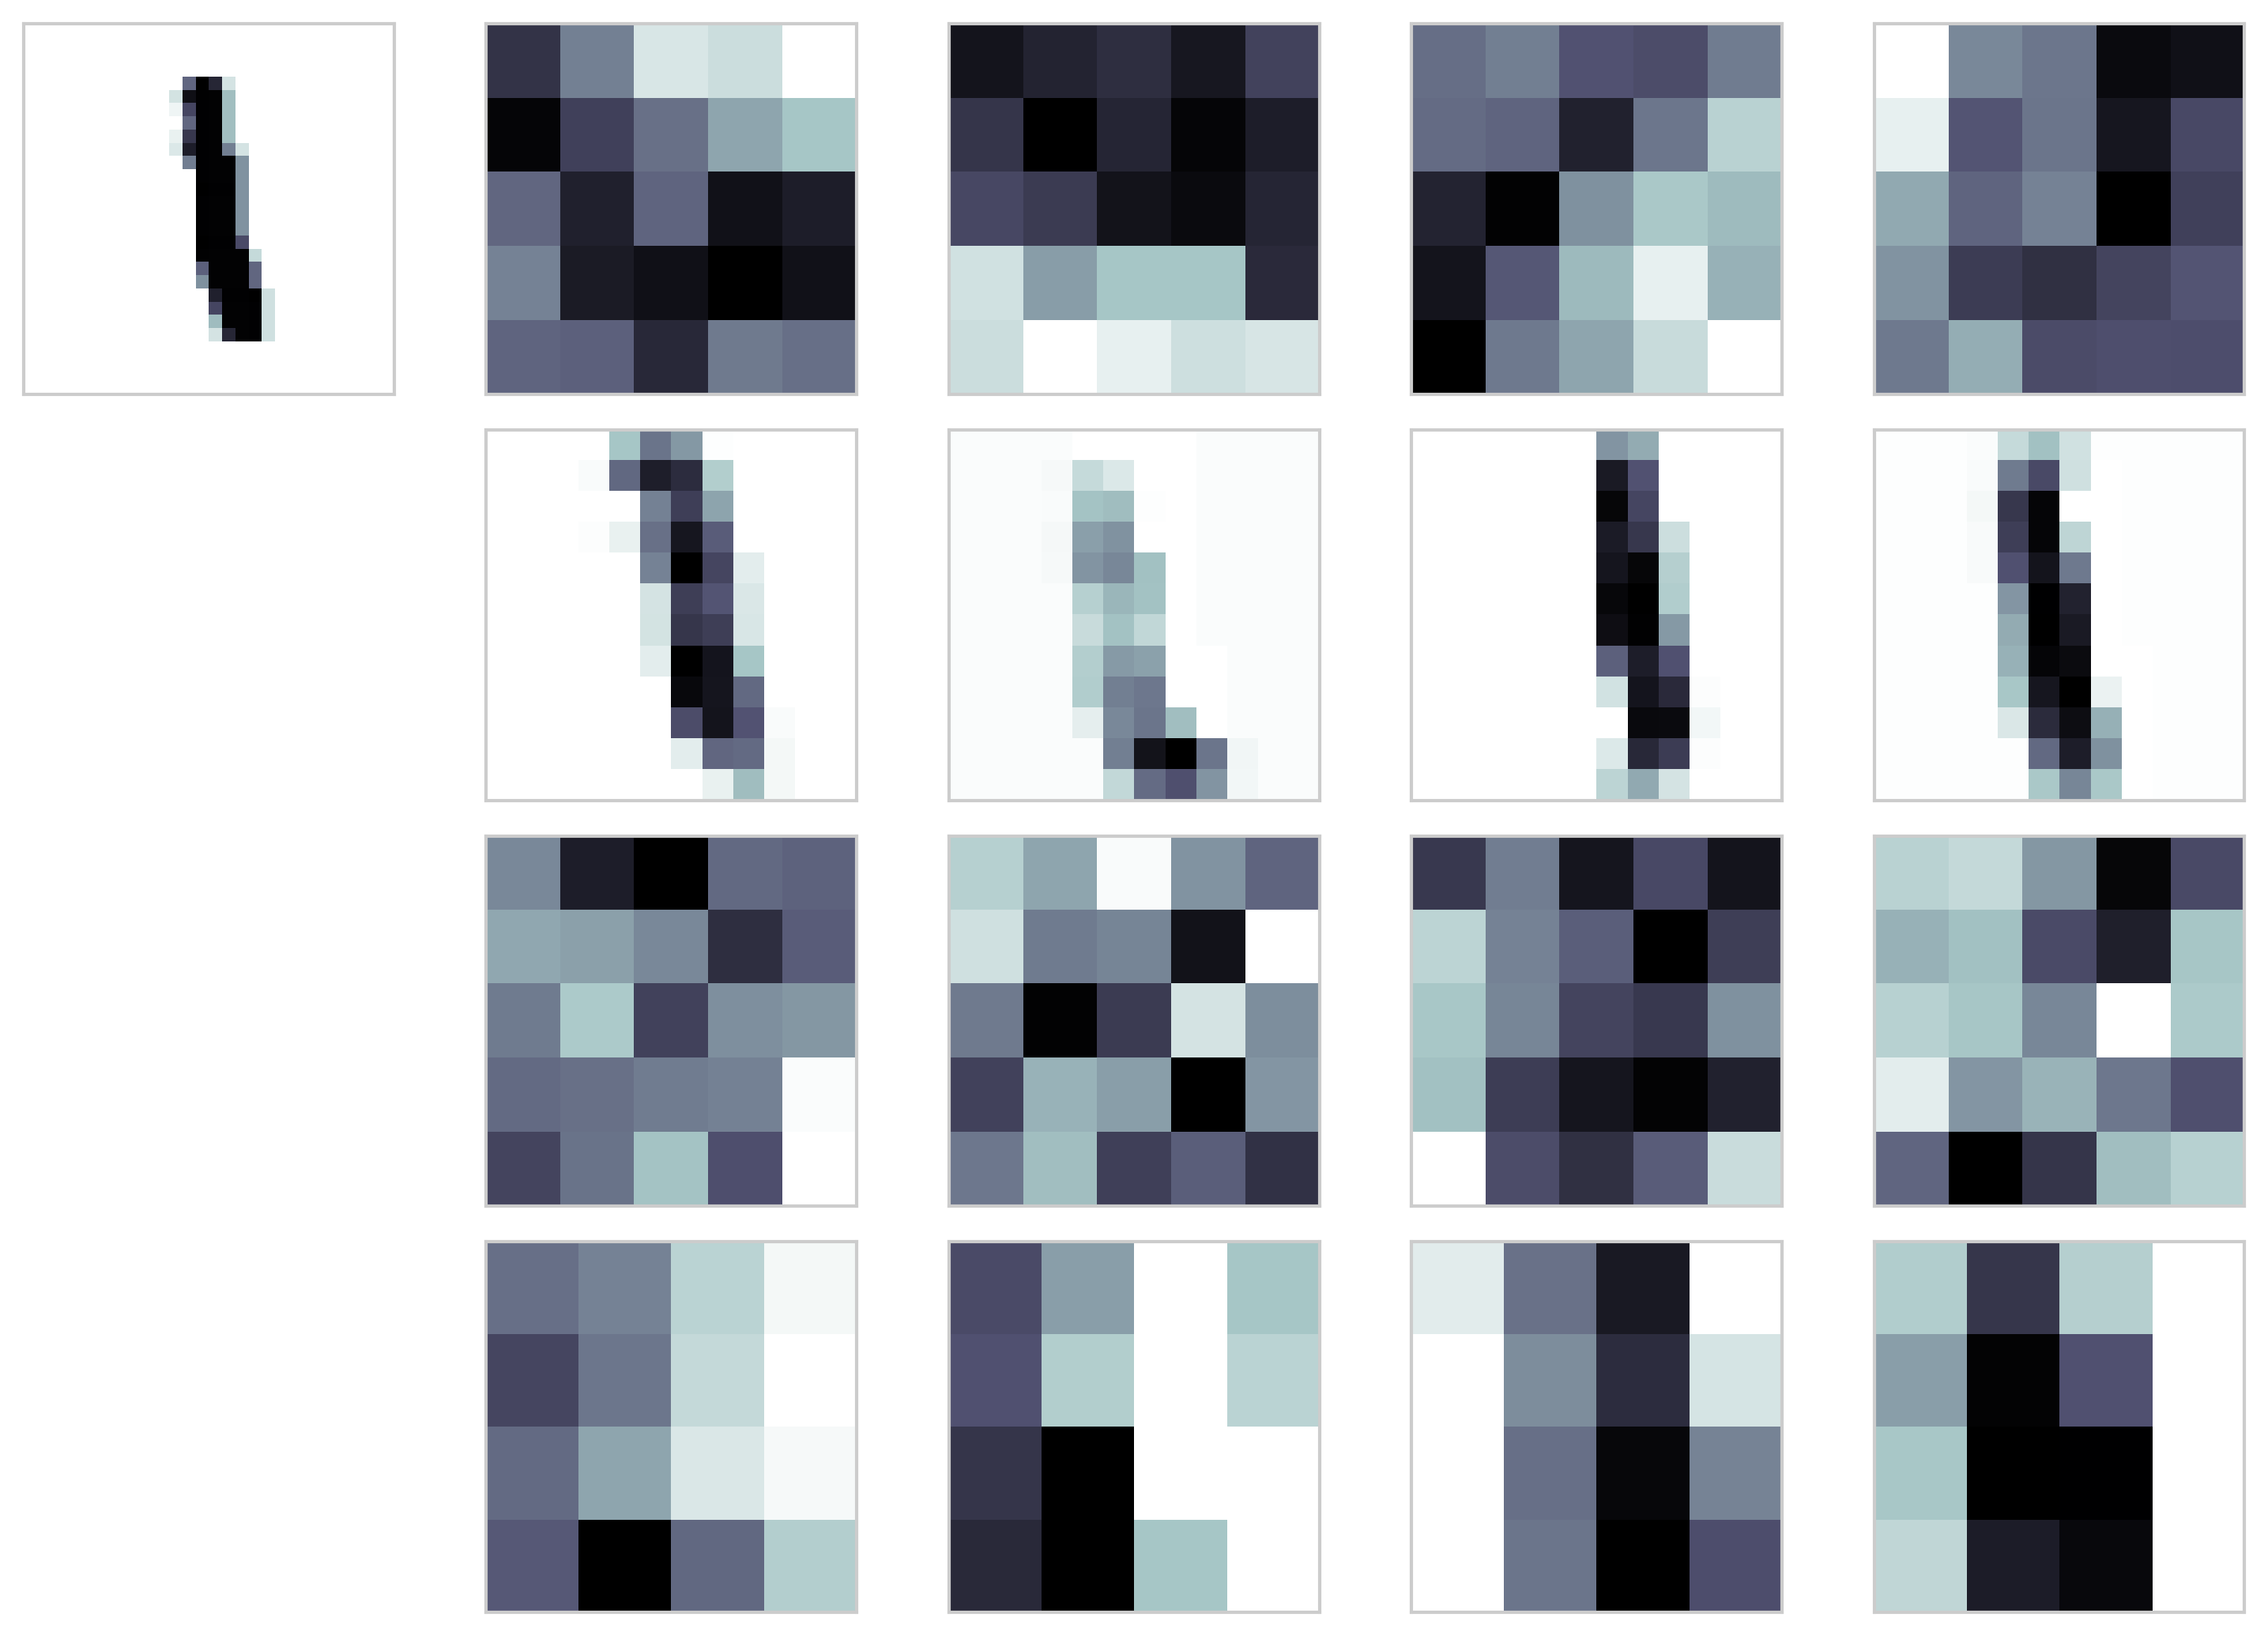

In [57]:
i = 6
visualize2(X_train[i:i + 1])

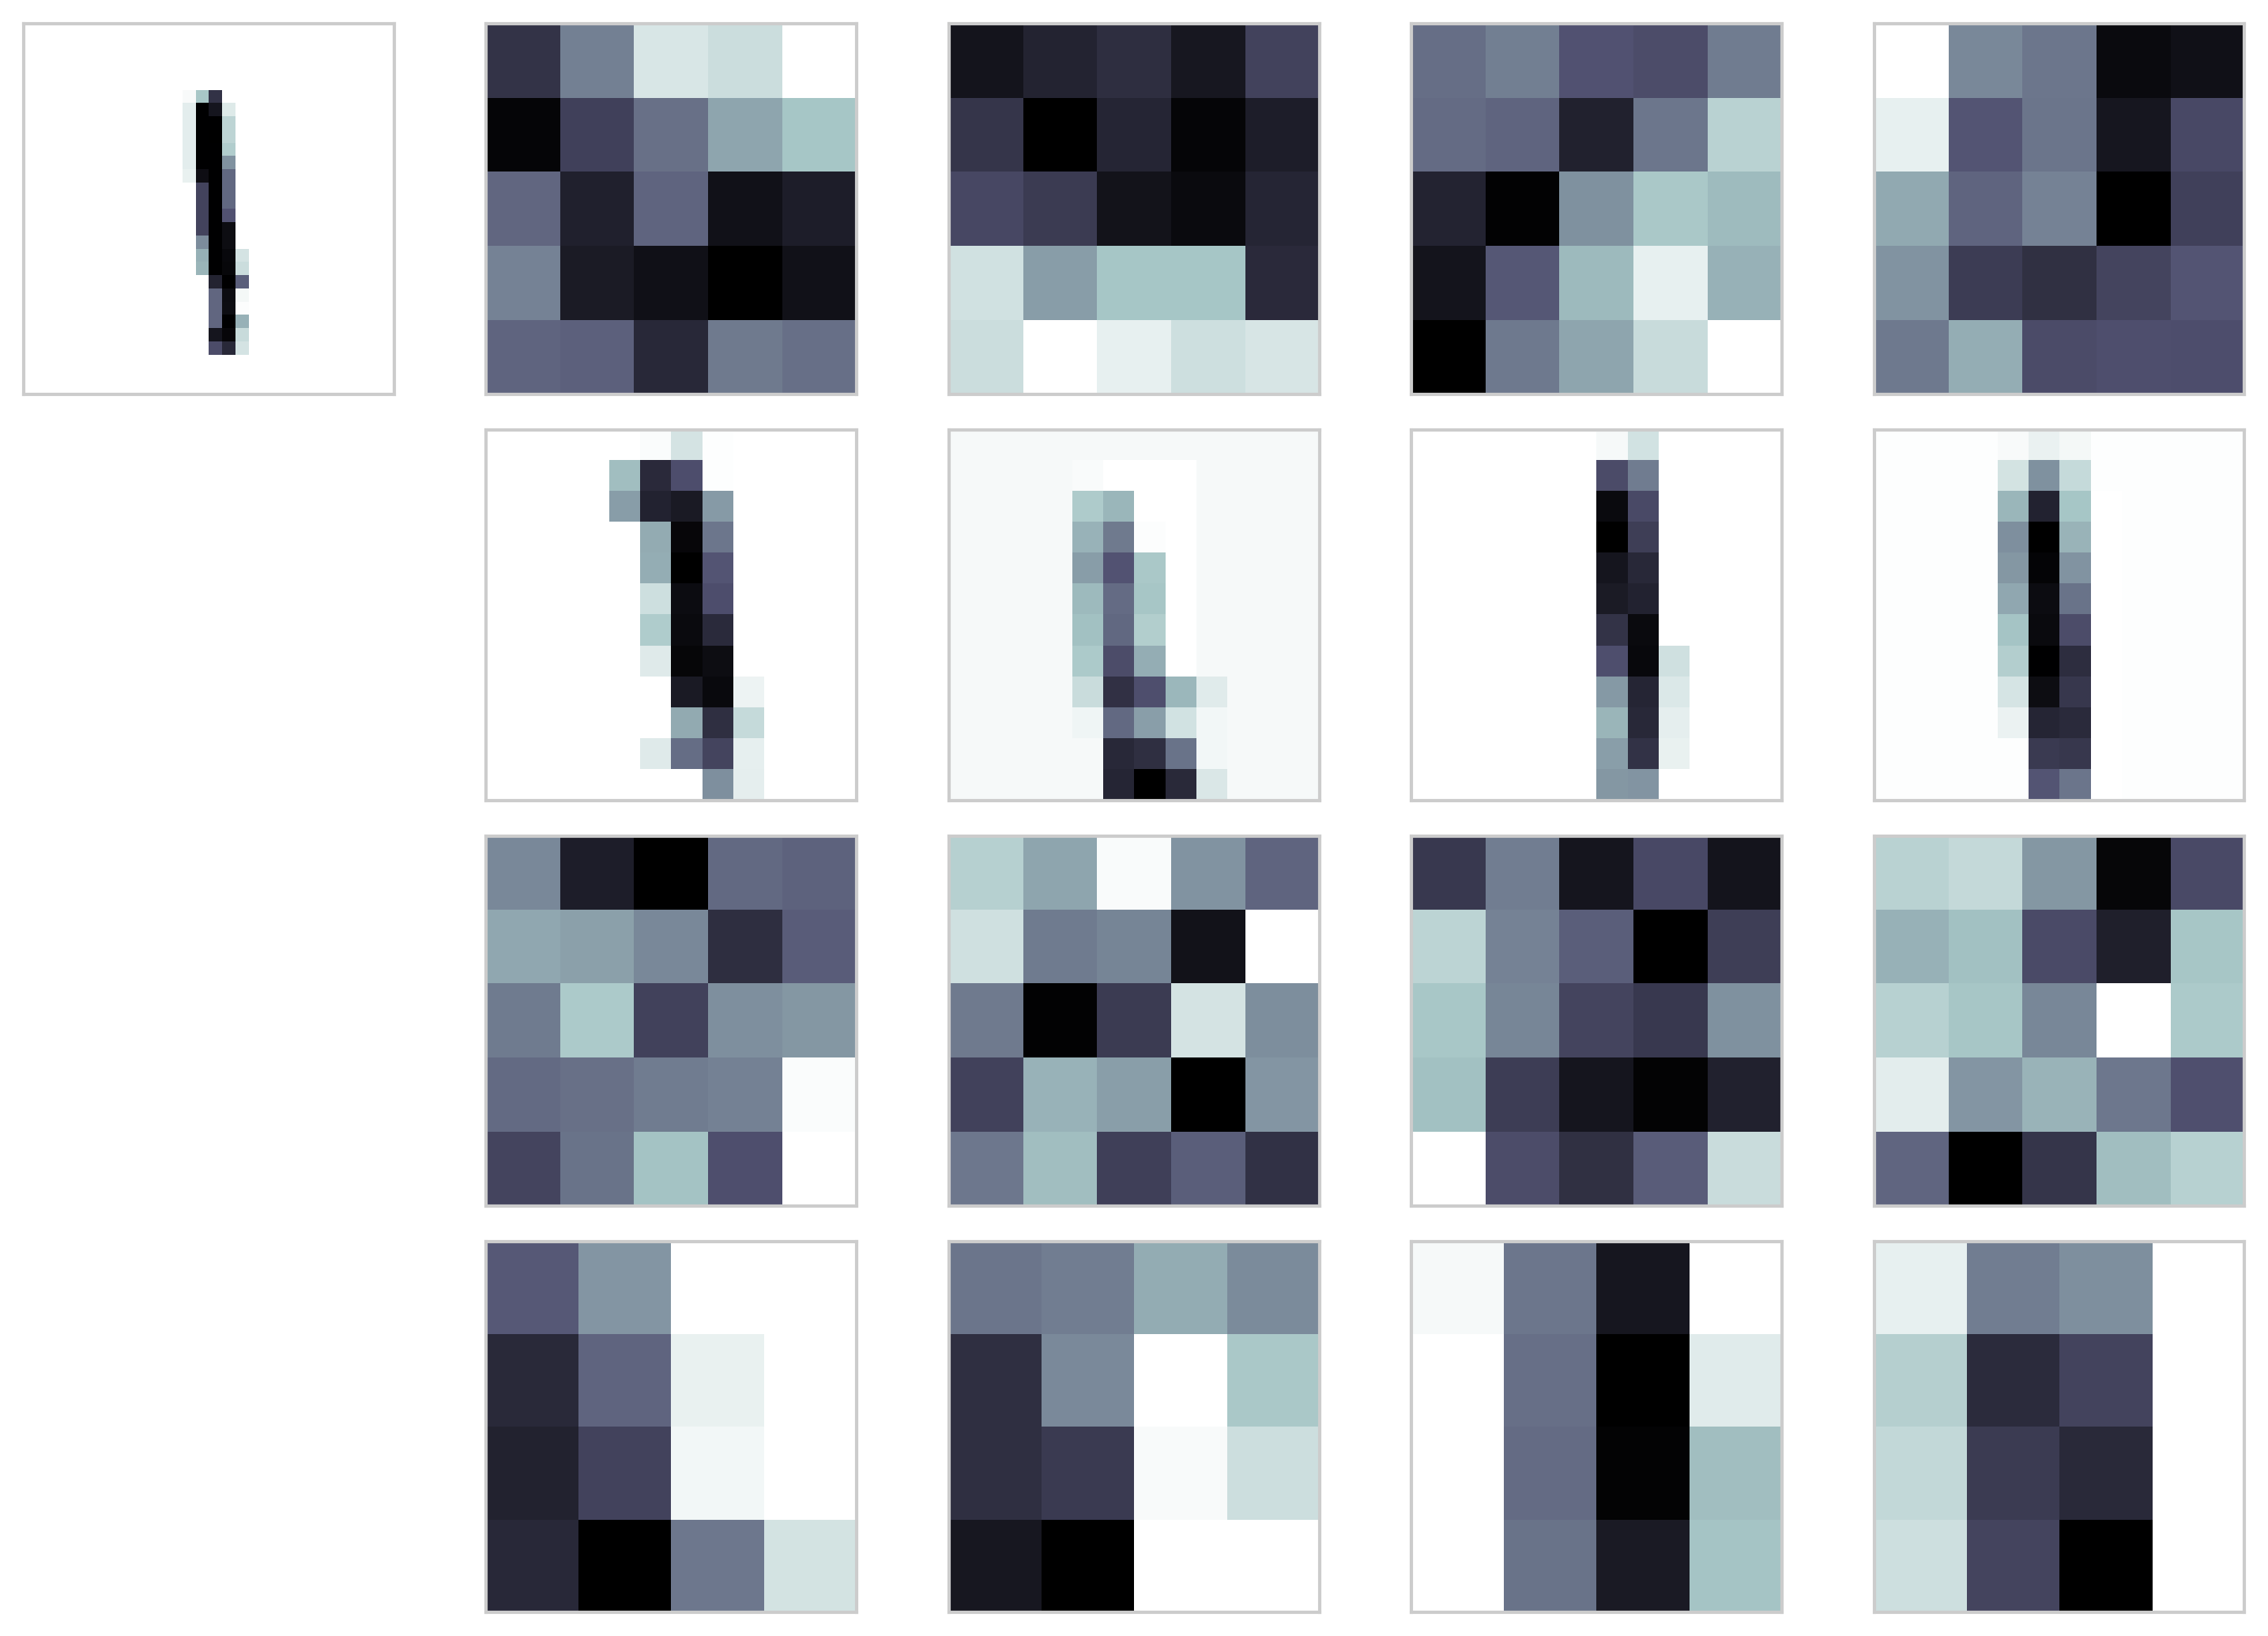

In [58]:
i = 8
visualize2(X_train[i:i + 1])

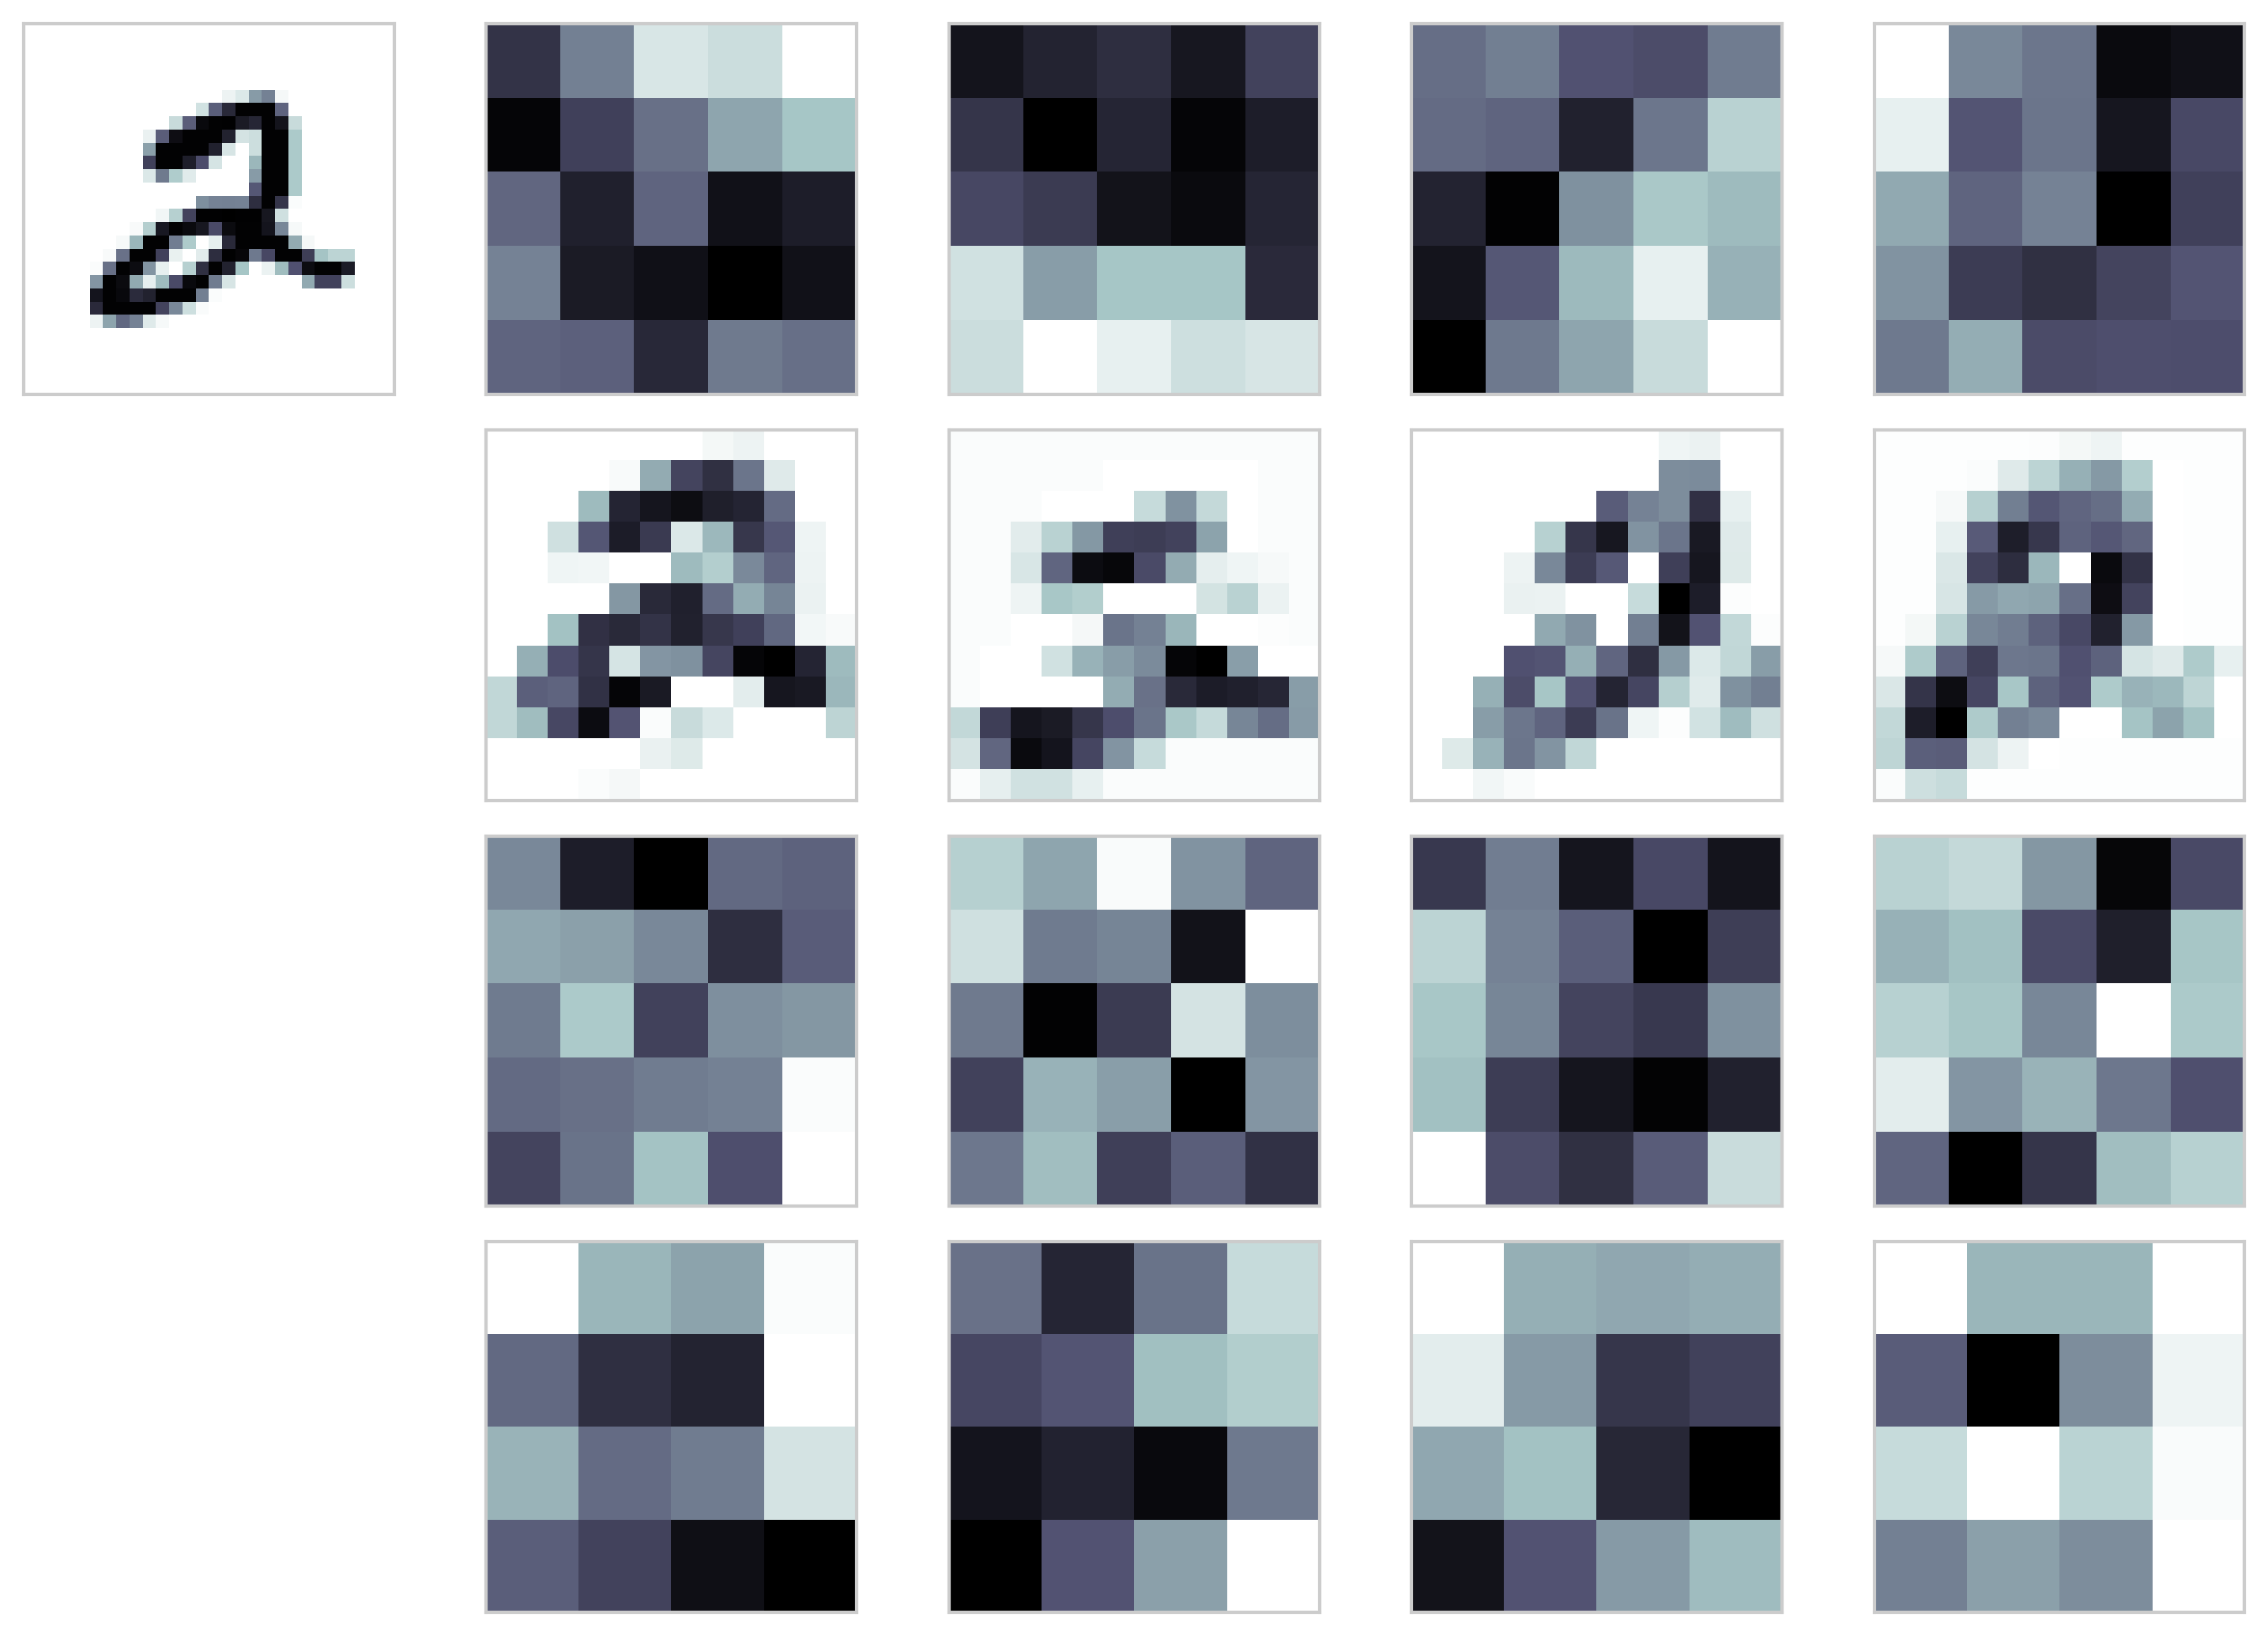

In [59]:
i = 5
visualize2(X_train[i:i + 1])

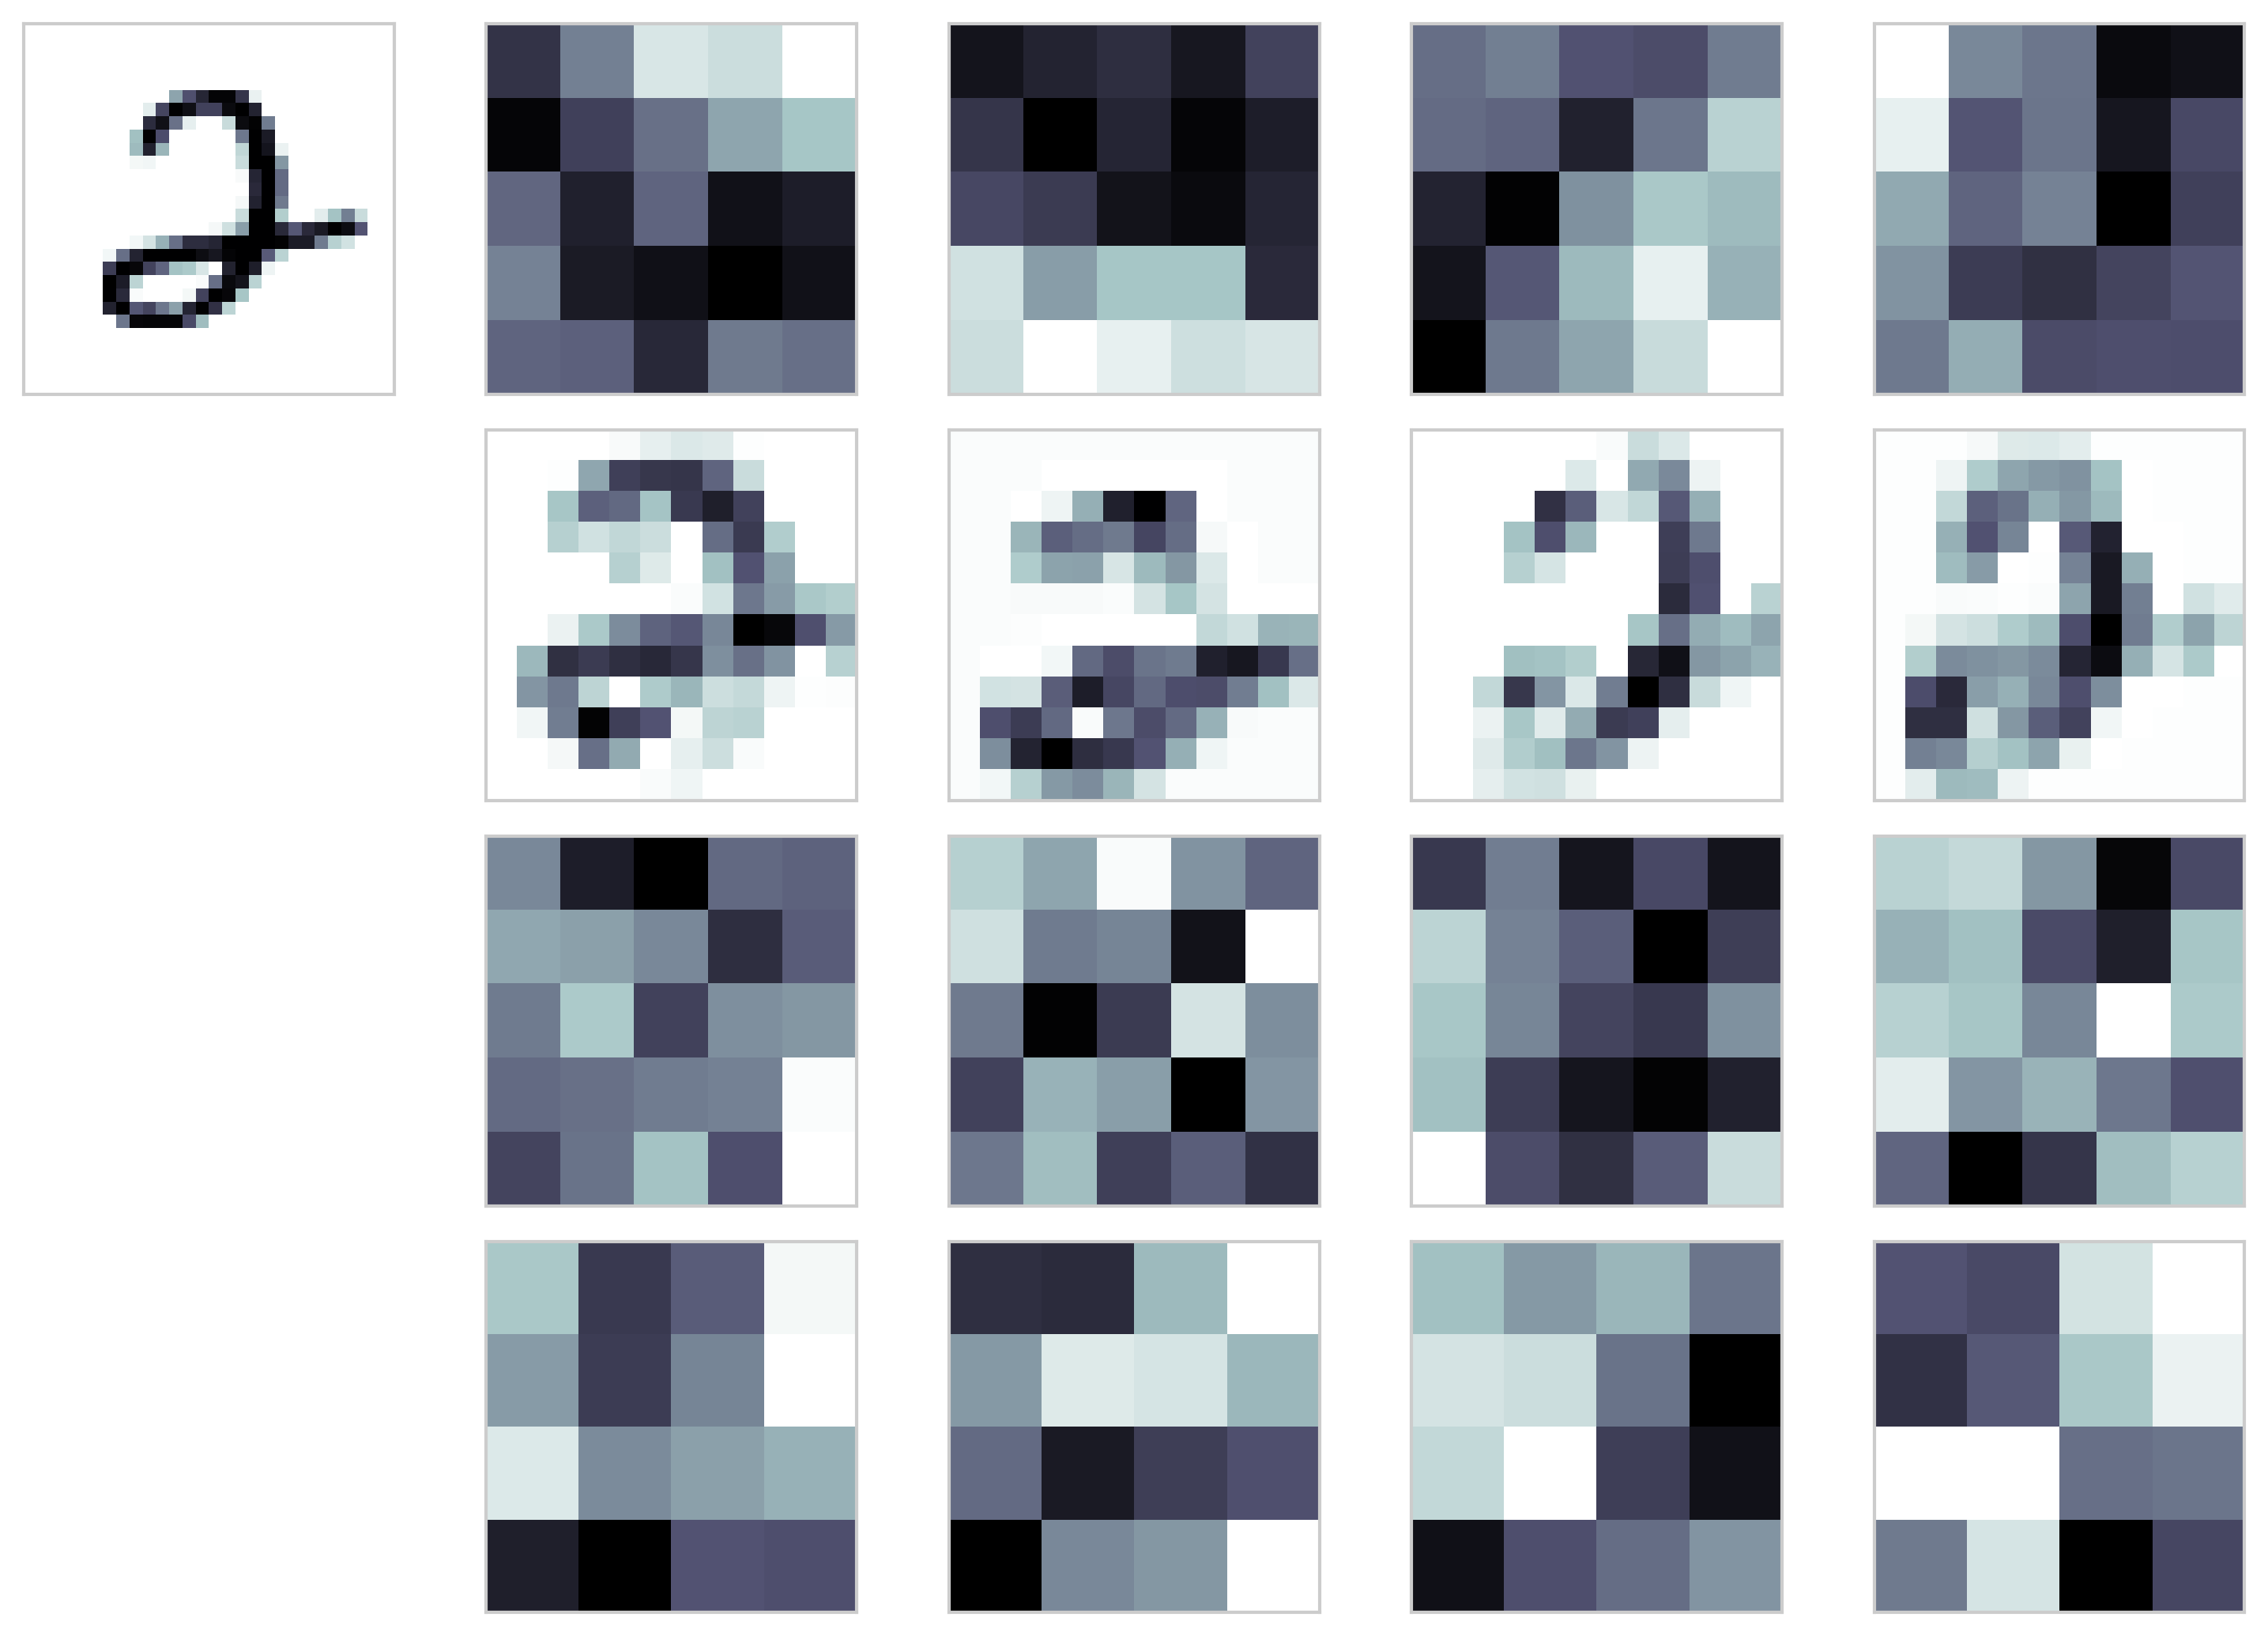

In [60]:
i = 16
visualize2(X_train[i:i + 1])